In [1]:
import pandas as pd

In [2]:
import dask.dataframe as dd

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

In [4]:
from datetime import datetime

In [5]:
import matplotlib.pyplot as plt

In [6]:
from scipy import linalg

In [7]:
import numpy as np

In [8]:
import six

## 파일 읽어들이기

In [25]:
r_df.to_csv('r_df.csv')

In [9]:
client = pd.read_csv('제4회 Big Data Competition-분석용데이터-01.고객DEMO.txt')

In [10]:
shop_product = pd.read_csv('제4회 Big Data Competition-분석용데이터-02.쇼핑업종 상품구매.txt')

In [11]:
notshop_product = pd.read_csv('제4회 Big Data Competition-분석용데이터-03.쇼핑외 업종 상품구매.txt')

In [12]:
product_category = pd.read_csv('제4회 Big Data Competition-분석용데이터-04.쇼핑업종 상품분류.txt')

In [78]:
demo_shop_category = pd.read_csv('demo_shop_category.csv')

In [117]:
gs_price_date = pd.read_csv('T2_price_date.csv')

In [9]:
gs_price_sum = pd.read_csv('T2_price_sum.csv')

In [101]:
gs_mulprice_date = pd.read_csv('T2_mulprice_date.csv')

In [13]:
gs_mulprice_sum = pd.read_csv('T2_mulprice_sum.csv')

In [9]:
gs_dcast = pd.read_csv('table_dcast.csv')

In [11]:
gs_t1_dcast = pd.read_csv('T1_dcast.csv')

In [13]:
dshop = client.merge(shop_product, how='left', right_on='ID', left_on='ID')

In [12]:
dshop.head(10)

,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT
0,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0
1,1,1,60PRD,52.0,314285.0,A01,478.0,2.0,20150513.0,14.0,15000.0,1.0
2,1,1,60PRD,52.0,48978.0,A01,366.0,2.0,20150801.0,19.0,166400.0,1.0
3,1,1,60PRD,52.0,48978.0,A01,232.0,2.0,20151228.0,12.0,166000.0,1.0
4,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,1000.0,2.0
5,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,6900.0,1.0
6,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,2400.0,2.0
7,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,1000.0,1.0
8,1,1,60PRD,52.0,370752.0,A01,15.0,2.0,20151104.0,18.0,3200.0,1.0
9,1,1,60PRD,52.0,100812.0,A01,236.0,2.0,20150128.0,12.0,29800.0,1.0


In [16]:
dshop['PD_S_C'] = dshop['PD_S_C'].astype('str')
dshop['BIZ_UNIT'] = dshop['BIZ_UNIT'].astype('str')

In [17]:
dshop['itemID'] = dshop[['BIZ_UNIT', 'PD_S_C']].apply(lambda x: ''.join(x), axis=1)

In [18]:
dshop.dtypes

ID              int64
GENDER          int64
AGE_PRD        object
HOM_PST_NO    float64
RCT_NO        float64
BIZ_UNIT       object
PD_S_C         object
BR_C          float64
DE_DT         float64
DE_HR         float64
BUY_AM        float64
BUY_CT        float64
itemID         object
dtype: object

In [19]:
ct = dshop.groupby(['ID', 'itemID'])['BUY_CT'].sum()
ct.to_frame()
ct.dtypes
# dshop['CT'] = dshop.groupby(['ID','itemID']).size().reset_index().groupby('BUY_CT')[[0]].sum()

BUY_CT
ID    itemID           
1     A011.0        1.0
      A01121.0      4.0
      A01122.0      3.0
      A01123.0      2.0
      A0115.0       3.0
      A0116.0       1.0
      A0118.0       1.0
      A01191.0      1.0
      A012.0        1.0
      A0120.0       2.0
      A01232.0      2.0
      A01236.0      1.0
      A01294.0      2.0
      A013.0        1.0
      A01318.0      1.0
      A0134.0       1.0
      A01340.0      1.0
      A01353.0      1.0
      A01366.0      4.0
      A01367.0      2.0
      A01446.0      3.0
      A01448.0      1.0
      A0146.0       3.0
      A01462.0      1.0
      A01478.0      2.0
      A01479.0      1.0
      A01493.0      1.0
      A01499.0      1.0
      A0153.0       1.0
      A0171.0      17.0
...                 ...
19996 A0276.0       1.0
      A0277.0       1.0
      A02815.0      1.0
      A02871.0      1.0
      A02897.0      1.0
19997 A03188.0      1.0
      A03232.0      1.0
      A0325.0       1.0
      A0326.0       1.0
      A03268.0      2.0
      A03319.0      3.0
      A03322.0      1.0
      A03343.0      1.0
      A03466.0      7.0
      A03486.0      1.0
      A03528.0      1.0
      A03539.0      6.0
      A0356.0       2.0
      A0371.0       1.0
      A03715.0      1.0
      A03776.0      5.0
19998 A021154.0    17.0
      A02126.0      1.0
      A021490.0     1.0
      A02407.0      1.0
      A02424.0      1.0
      A02443.0      1.0
      A02679.0      1.0
19999 A01421.0      1.0
20000 A01189.0      1.0

[1474016 rows x 1 columns]

dtype('float64')

In [22]:
type(ct)

pandas.core.series.Series

In [23]:
ct.to_frame()

BUY_CT
ID    itemID           
1     A011.0        1.0
      A01121.0      4.0
      A01122.0      3.0
      A01123.0      2.0
      A0115.0       3.0
      A0116.0       1.0
      A0118.0       1.0
      A01191.0      1.0
      A012.0        1.0
      A0120.0       2.0
      A01232.0      2.0
      A01236.0      1.0
      A01294.0      2.0
      A013.0        1.0
      A01318.0      1.0
      A0134.0       1.0
      A01340.0      1.0
      A01353.0      1.0
      A01366.0      4.0
      A01367.0      2.0
      A01446.0      3.0
      A01448.0      1.0
      A0146.0       3.0
      A01462.0      1.0
      A01478.0      2.0
      A01479.0      1.0
      A01493.0      1.0
      A01499.0      1.0
      A0153.0       1.0
      A0171.0      17.0
...                 ...
19996 A0276.0       1.0
      A0277.0       1.0
      A02815.0      1.0
      A02871.0      1.0
      A02897.0      1.0
19997 A03188.0      1.0
      A03232.0      1.0
      A0325.0       1.0
      A0326.0       1.0
      A03268.0      2.0
      A03319.0      3.0
      A03322.0      1.0
      A03343.0      1.0
      A03466.0      7.0
      A03486.0      1.0
      A03528.0      1.0
      A03539.0      6.0
      A0356.0       2.0
      A0371.0       1.0
      A03715.0      1.0
      A03776.0      5.0
19998 A021154.0    17.0
      A02126.0      1.0
      A021490.0     1.0
      A02407.0      1.0
      A02424.0      1.0
      A02443.0      1.0
      A02679.0      1.0
19999 A01421.0      1.0
20000 A01189.0      1.0

[1474016 rows x 1 columns]

In [20]:
ct = ct.to_frame()

In [21]:
ct = ct.reset_index(level=['ID', 'itemID'])

In [22]:
dmshop = dshop.merge(ct, how='left', on=['ID', 'itemID'])

In [28]:
dmshop.head()

,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT_x,itemID,BUY_CT_y
0,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,A01478.0,2.0
1,1,1,60PRD,52.0,314285.0,A01,478.0,2.0,20150513.0,14.0,15000.0,1.0,A01478.0,2.0
2,1,1,60PRD,52.0,48978.0,A01,366.0,2.0,20150801.0,19.0,166400.0,1.0,A01366.0,4.0
3,1,1,60PRD,52.0,48978.0,A01,232.0,2.0,20151228.0,12.0,166000.0,1.0,A01232.0,2.0
4,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,1000.0,2.0,A0171.0,17.0


## 이제 시작이다

In [29]:
r_df = ct.pivot(index='ID', columns='itemID', values='BUY_CT').fillna(0)

In [30]:
r_df

itemID,A011.0,A0110.0,A01100.0,A01101.0,A01102.0,A01103.0,A01104.0,A01105.0,A01106.0,A01107.0,...,A0591.0,A0592.0,A0593.0,A0594.0,A0595.0,A0596.0,A0597.0,A0598.0,A0599.0,nannan
ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
r=r_df.as_matrix()
user_buy_mean = np.mean(r, axis=1)
user_buy_mean

array([  1.82106097e-02,   8.95223014e-01,   1.17524413e+00, ...,
         6.07020322e-03,   2.63921879e-04,   2.63921879e-04])

In [32]:
r_demeaned = r - user_buy_mean.reshape(-1,1)
r
user_buy_mean.reshape(-1,1)
r_demeaned

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

array([[  1.82106097e-02],
       [  8.95223014e-01],
       [  1.17524413e+00],
       ..., 
       [  6.07020322e-03],
       [  2.63921879e-04],
       [  2.63921879e-04]])

array([[  9.81789390e-01,  -1.82106097e-02,  -1.82106097e-02, ...,
         -1.82106097e-02,  -1.82106097e-02,  -1.82106097e-02],
       [ -8.95223014e-01,  -8.95223014e-01,  -8.95223014e-01, ...,
         -8.95223014e-01,  -8.95223014e-01,  -8.95223014e-01],
       [ -1.17524413e+00,  -1.17524413e+00,  -1.17524413e+00, ...,
         -1.17524413e+00,  -1.17524413e+00,  -1.17524413e+00],
       ..., 
       [ -6.07020322e-03,  -6.07020322e-03,  -6.07020322e-03, ...,
         -6.07020322e-03,  -6.07020322e-03,  -6.07020322e-03],
       [ -2.63921879e-04,  -2.63921879e-04,  -2.63921879e-04, ...,
         -2.63921879e-04,  -2.63921879e-04,  -2.63921879e-04],
       [ -2.63921879e-04,  -2.63921879e-04,  -2.63921879e-04, ...,
         -2.63921879e-04,  -2.63921879e-04,  -2.63921879e-04]])

In [52]:
r_demeaned.shape

(20000, 3789)

In [47]:
from scipy.sparse.linalg import svds
u, sigma, vt = svds(r_demeaned, k=100)
u
sigma
vt

array([[  1.98460987e-05,   5.33842806e-08,  -7.68164383e-06, ...,
          6.78179837e-08,   4.13335473e-09,  -1.41548485e-07],
       [ -1.25056966e-02,   6.74206662e-03,   1.55977683e-02, ...,
         -2.27180321e-05,  -8.04036485e-05,   9.27922484e-05],
       [ -1.95664396e-03,  -5.48010462e-04,   3.56827293e-04, ...,
         -4.19964631e-03,   6.32276410e-04,   1.22933595e-03],
       ..., 
       [  2.82274484e-06,   3.05569645e-05,   2.15004482e-05, ...,
         -4.95718682e-08,  -3.62329023e-07,   2.50538857e-07],
       [  8.82594295e-08,  -1.70876647e-07,  -2.70570775e-07, ...,
          2.02505420e-09,   2.40424699e-10,  -2.32191401e-09],
       [ -1.36863473e-08,   9.70516508e-08,  -2.04007429e-08, ...,
          1.69366991e-09,   5.31392058e-10,  -2.56062166e-09]])

array([   4515.62021549,    4584.12426202,    4608.40649844,
          4631.85452437,    4657.70345259,    4673.13906424,
          4757.77178096,    4806.16058961,    4831.77525284,
          4927.84927532,    5010.54238525,    5059.3545591 ,
          5109.90480987,    5117.91567649,    5328.27474386,
          5439.49422907,    5481.37032953,    5575.54249044,
          5852.19056449,    5932.04982848,    5932.99504583,
          6253.06103419,    6341.5595317 ,    6491.44272992,
          6696.75430192,    6750.50814389,    7041.90463364,
          7767.31302383,    7804.83379116,    7973.41903429,
          8086.76838136,    8505.99401849,    8575.51665793,
          8615.78580355,    8704.30119423,    9026.93360991,
          9142.2405453 ,    9267.68980516,    9389.40691167,
          9551.04575384,    9824.19390959,    9932.1993363 ,
         10830.44882942,   10955.30225767,   11119.47145292,
         11149.77636231,   11227.36029413,   11736.88184528,
         11989.73838153,

array([[  1.53270160e-03,   2.89284406e-04,   3.13425816e-04, ...,
          2.76413635e-04,   3.56669772e-04,   2.69387133e-04],
       [  9.22650989e-04,   5.59426577e-04,   5.37661512e-04, ...,
          5.27152226e-04,   5.24830031e-04,   5.24919602e-04],
       [  1.22033729e-03,  -2.71003798e-04,  -2.44250481e-04, ...,
         -2.76166030e-04,  -2.32055392e-04,  -2.67967046e-04],
       ..., 
       [  2.22924198e-04,   2.92293629e-04,   2.94388757e-04, ...,
          2.94727351e-04,   2.93899538e-04,   2.94701431e-04],
       [  4.21153341e-05,   1.29161475e-04,   1.34288996e-04, ...,
          1.33551586e-04,   1.32208891e-04,   1.34214486e-04],
       [ -6.87832867e-04,  -7.80852565e-04,  -7.87525343e-04, ...,
         -7.88045527e-04,  -7.85776440e-04,  -7.88714498e-04]])

In [34]:
sigma = np.diag(sigma)

In [54]:
sigma.shape

(100,)

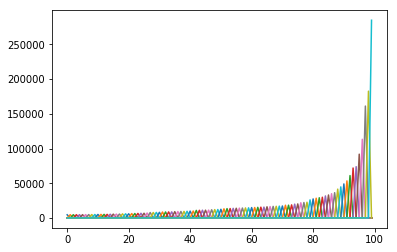

In [35]:
plt.plot(sigma)
plt.show()

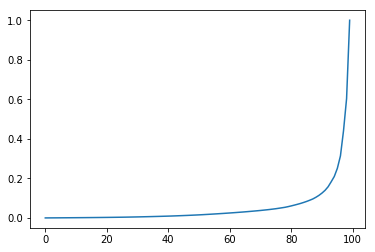

In [48]:
sigma_svd = np.cumsum(sigma**2/sum(sigma**2))
plt.plot(sigma_svd)
plt.show()

In [62]:
U = u[0:-1, 0:50]
U

array([[  1.98460987e-05,   5.33842806e-08,  -7.68164383e-06, ...,
         -2.17085392e-06,  -5.21099223e-07,   9.44716274e-06],
       [ -1.25056966e-02,   6.74206662e-03,   1.55977683e-02, ...,
         -1.06369993e-02,   9.86522522e-03,   4.70643871e-04],
       [ -1.95664396e-03,  -5.48010462e-04,   3.56827293e-04, ...,
          1.01648644e-03,  -1.26436279e-03,   6.15556710e-04],
       ..., 
       [  8.35512447e-07,  -8.46638016e-06,  -8.18208796e-06, ...,
         -5.92231230e-07,   9.12884153e-08,  -1.92301793e-07],
       [  2.82274484e-06,   3.05569645e-05,   2.15004482e-05, ...,
         -1.31373237e-04,  -7.34516939e-05,   1.13116211e-04],
       [  8.82594295e-08,  -1.70876647e-07,  -2.70570775e-07, ...,
         -9.58285688e-08,   2.95356493e-08,  -2.86304746e-08]])

In [63]:
S = np.diag(sigma[0:50])
S

array([[  4515.62021549,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,   4584.12426202,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,   4608.40649844, ...,
             0.        ,      0.        ,      0.        ],
       ..., 
       [     0.        ,      0.        ,      0.        , ...,
         11736.88184528,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,  11989.73838153,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,  12102.65736663]])

In [64]:
VH = vt[0:50, 0:3789]
VH

array([[  1.53270160e-03,   2.89284406e-04,   3.13425816e-04, ...,
          2.76413635e-04,   3.56669772e-04,   2.69387133e-04],
       [  9.22650989e-04,   5.59426577e-04,   5.37661512e-04, ...,
          5.27152226e-04,   5.24830031e-04,   5.24919602e-04],
       [  1.22033729e-03,  -2.71003798e-04,  -2.44250481e-04, ...,
         -2.76166030e-04,  -2.32055392e-04,  -2.67967046e-04],
       ..., 
       [ -1.62572212e-04,  -4.01337171e-05,  -7.53768080e-05, ...,
         -6.97012300e-05,  -8.56166394e-05,  -7.27016123e-05],
       [  2.25360277e-04,  -2.40813955e-04,  -3.08017864e-04, ...,
         -3.27456278e-04,  -3.54516635e-04,  -3.17939163e-04],
       [ -2.97618775e-04,  -1.24303202e-04,  -7.49997641e-05, ...,
         -7.67524429e-05,  -7.31654145e-05,  -7.97165605e-05]])

In [65]:
np.corrcoef(np.transpose(r_df))

/Users/kwonsooyoung/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/kwonsooyoung/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[  1.00000000e+00,   1.05247726e-01,   1.67027342e-03, ...,
          6.01933283e-03,   1.70502363e-02,              nan],
       [  1.05247726e-01,   1.00000000e+00,  -5.93243222e-03, ...,
          1.22678658e-02,   2.25446625e-02,              nan],
       [  1.67027342e-03,  -5.93243222e-03,   1.00000000e+00, ...,
          3.51203634e-04,   2.76469628e-03,              nan],
       ..., 
       [  6.01933283e-03,   1.22678658e-02,   3.51203634e-04, ...,
          1.00000000e+00,   1.10761773e-01,              nan],
       [  1.70502363e-02,   2.25446625e-02,   2.76469628e-03, ...,
          1.10761773e-01,   1.00000000e+00,              nan],
       [             nan,              nan,              nan, ...,
                     nan,              nan,              nan]])

In [66]:
item = np.matmul(S,VH)
item

array([[ 6.92109833,  1.30629851,  1.41531195, ...,  1.248179  ,
         1.61058523,  1.21644998],
       [ 4.22954678,  2.56448094,  2.46470718, ...,  2.41653131,
         2.40588608,  2.40629668],
       [ 5.62381028, -1.24889566, -1.12560551, ..., -1.27268533,
        -1.06940557, -1.23490107],
       ..., 
       [-1.90809084, -0.4710447 , -0.88468869, ..., -0.8180751 ,
        -1.00487238, -0.85329023],
       [ 2.70201077, -2.88729632, -3.6930536 , ..., -3.9261151 ,
        -4.2505617 , -3.81200738],
       [-3.60197806, -1.50439906, -0.90769645, ..., -0.92890852,
        -0.88549594, -0.96478222]])

In [57]:
np.corrcoef(np.transpose(item))

array([[ 1.        ,  0.63800646,  0.62001563, ...,  0.62110664,
         0.62488958,  0.61960604],
       [ 0.63800646,  1.        ,  0.99861912, ...,  0.99871772,
         0.99855742,  0.99866515],
       [ 0.62001563,  0.99861912,  1.        , ...,  0.999856  ,
         0.99945009,  0.99990295],
       ..., 
       [ 0.62110664,  0.99871772,  0.999856  , ...,  1.        ,
         0.99960357,  0.99995498],
       [ 0.62488958,  0.99855742,  0.99945009, ...,  0.99960357,
         1.        ,  0.99954522],
       [ 0.61960604,  0.99866515,  0.99990295, ...,  0.99995498,
         0.99954522,  1.        ]])

In [60]:
U.shape

(19999, 97)

In [61]:
np.corrcoef(np.transpose(item)).shape

(3789, 3789)

In [59]:
r_df.shape

(20000, 3789)

In [36]:
all_user_predicted_buy = np.dot(np.dot(u, sigma),vt)+user_buy_mean.reshape(-1,1)
preds_df = pd.DataFrame(all_user_predicted_buy, columns=r_df.columns)

In [68]:
all_user_predicted_buy = np.dot(np.dot(U,S),VH)
preds_df = pd.DataFrame(all_user_predicted_buy, columns=r_df.columns)

In [69]:
preds_df.head()

itemID,A011.0,A0110.0,A01100.0,A01101.0,A01102.0,A01103.0,A01104.0,A01105.0,A01106.0,A01107.0,...,A0591.0,A0592.0,A0593.0,A0594.0,A0595.0,A0596.0,A0597.0,A0598.0,A0599.0,nannan
0,0.006056,-0.000478,-0.000749,-0.000679,-0.000770,-0.000764,-0.000760,-0.000751,0.000788,0.005806,...,-0.000723,-0.000666,-0.000704,-0.000767,-0.000760,-0.000760,-0.000670,-0.000744,-0.000713,-0.000772
1,0.191173,-0.057997,-0.050163,-0.063979,-0.048013,-0.055934,-0.042198,-0.042971,0.045928,-0.101029,...,-0.047370,-0.049708,-0.043637,-0.049442,-0.054023,-0.051195,-0.050380,-0.052151,-0.056447,-0.048300
2,-0.054313,-0.005126,-0.066538,-0.073041,-0.074895,-0.057167,-0.079893,-0.074206,0.102603,-0.056978,...,-0.072360,-0.057903,-0.057780,-0.071457,-0.069008,-0.054998,-0.074536,-0.067818,-0.054093,-0.070668
3,0.219920,0.299339,0.332323,0.319025,0.337542,0.331836,0.348478,0.356158,0.617586,-0.364060,...,0.300630,0.353273,0.346913,0.350552,0.327522,0.341557,0.403727,0.338835,0.381834,0.348610
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.ID == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'itemID', right_on = 'itemID').
                     sort_values(['BUY_CT'], ascending=False)
                 )

   
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['itemID'].isin(user_full['itemID'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'itemID',
               right_on = 'itemID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [125]:
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.ID == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'itemID', right_on = 'itemID'))
                 

   
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['itemID'].isin(user_full['itemID'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'itemID',
               right_on = 'itemID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [40]:
# r_df.head(10)
ct.head(10)

,ID,itemID,BUY_CT
0,1,A011.0,1.0
1,1,A01121.0,4.0
2,1,A01122.0,3.0
3,1,A01123.0,2.0
4,1,A0115.0,3.0
5,1,A0116.0,1.0
6,1,A0118.0,1.0
7,1,A01191.0,1.0
8,1,A012.0,1.0
9,1,A0120.0,2.0


In [41]:
product_categoryegory.head(10)

,BIZ_UNIT,PD_S_C,PD_S_NM,PD_M_NM,PD_H_NM
0,A04,341,단행본서적(직배),특수점서적,서적/음반
1,A04,1,삼각김밥,삼각김밥,미반
2,A04,2,The커진삼각김밥,삼각김밥,미반
3,A04,3,말이김밥,김밥,미반
4,A04,4,트레이김밥,김밥,미반
5,A04,5,초밥,김밥,미반
6,A04,6,도시락,도시락,미반
7,A04,7,미니도시락,도시락,미반
8,A04,8,기타,도시락,미반
9,A04,9,국/찌개도시락,도시락,미반


In [74]:
already_rated, predictions = recommend_movies(preds_df, 7500, product_category, ct, 100)


In [75]:
already_rated

,ID,itemID,BUY_CT,BIZ_UNIT,PD_S_C,PD_S_NM,PD_M_NM,PD_H_NM
8,7500,A01318.0,1047.0,NaN,NaN,NaN,NaN,NaN
14,7500,A019.0,5.0,NaN,NaN,NaN,NaN,NaN
33,7500,A0276.0,4.0,NaN,NaN,NaN,NaN,NaN
31,7500,A0262.0,4.0,NaN,NaN,NaN,NaN,NaN
13,7500,A0188.0,4.0,NaN,NaN,NaN,NaN,NaN
30,7500,A0260.0,2.0,NaN,NaN,NaN,NaN,NaN
35,7500,A041.0,2.0,NaN,NaN,NaN,NaN,NaN
32,7500,A02753.0,2.0,NaN,NaN,NaN,NaN,NaN
7,7500,A0122.0,2.0,NaN,NaN,NaN,NaN,NaN
9,7500,A01595.0,2.0,NaN,NaN,NaN,NaN,NaN


In [76]:
predictions

,BIZ_UNIT,PD_S_C,PD_S_NM,PD_M_NM,PD_H_NM,itemID
0,A04,341,단행본서적(직배),특수점서적,서적/음반,A04341
1,A04,1,삼각김밥,삼각김밥,미반,A041
2,A04,2,The커진삼각김밥,삼각김밥,미반,A042
3,A04,3,말이김밥,김밥,미반,A043
4,A04,4,트레이김밥,김밥,미반,A044
5,A04,5,초밥,김밥,미반,A045
6,A04,6,도시락,도시락,미반,A046
7,A04,7,미니도시락,도시락,미반,A047
8,A04,8,기타,도시락,미반,A048
9,A04,9,국/찌개도시락,도시락,미반,A049


## 다시 시작이다

In [26]:
type(r_df)

pandas.core.frame.DataFrame

In [28]:
r_df.count()

itemID
A011.0      20000
A0110.0     20000
A01100.0    20000
A01101.0    20000
A01102.0    20000
A01103.0    20000
A01104.0    20000
A01105.0    20000
A01106.0    20000
A01107.0    20000
A01108.0    20000
A01109.0    20000
A0111.0     20000
A01110.0    20000
A01111.0    20000
A01112.0    20000
A01113.0    20000
A01114.0    20000
A01115.0    20000
A01116.0    20000
A01117.0    20000
A01118.0    20000
A01119.0    20000
A0112.0     20000
A01120.0    20000
A01121.0    20000
A01122.0    20000
A01123.0    20000
A01124.0    20000
A01125.0    20000
            ...  
A0573.0     20000
A0574.0     20000
A0575.0     20000
A0576.0     20000
A0577.0     20000
A0578.0     20000
A0579.0     20000
A058.0      20000
A0580.0     20000
A0581.0     20000
A0582.0     20000
A0583.0     20000
A0584.0     20000
A0585.0     20000
A0586.0     20000
A0587.0     20000
A0588.0     20000
A0589.0     20000
A059.0      20000
A0590.0     20000
A0591.0     20000
A0592.0     20000
A0593.0     20000
A0594.0     20000
A05

In [ ]:
r_df_2 = r_df.head

In [27]:
r_df.values.tolist()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [45]:
dshop.head()

,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,itemID,CT
0,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,A01478.0,NaN
1,1,1,60PRD,52.0,314285.0,A01,478.0,2.0,20150513.0,14.0,15000.0,1.0,A01478.0,2.572047e+10
2,1,1,60PRD,52.0,48978.0,A01,366.0,2.0,20150801.0,19.0,166400.0,1.0,A01366.0,2.521785e+09
3,1,1,60PRD,52.0,48978.0,A01,232.0,2.0,20151228.0,12.0,166000.0,1.0,A01232.0,6.183065e+08
4,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,1000.0,2.0,A0171.0,2.889714e+08


In [42]:
product_category['PD_S_C']=product_category['PD_S_C'].astype(str)
product_category['itemID'] = product_category[['BIZ_UNIT', 'PD_S_C']].apply(lambda x: ''.join(x), axis=1)

In [43]:
product_category.head()

,BIZ_UNIT,PD_S_C,PD_S_NM,PD_M_NM,PD_H_NM,itemID
0,A04,341,단행본서적(직배),특수점서적,서적/음반,A04341
1,A04,1,삼각김밥,삼각김밥,미반,A041
2,A04,2,The커진삼각김밥,삼각김밥,미반,A042
3,A04,3,말이김밥,김밥,미반,A043
4,A04,4,트레이김밥,김밥,미반,A044


In [37]:
dshop['BIZ_UNIT'].fillna("no", inplace=True)
dshop['PD_S_C'].fillna("no", inplace=True)

## gs_데이터 탐색

In [10]:
gs_dcast.head(10)

,ID,A01_1,A01_2,A01_3,A01_4,A01_5,A01_6,A01_7,A01_8,A01_9,...,201511_D03,201512_B01,201512_B02,201512_B03,201512_C01,201512_C02,201512_C03,201512_D01,201512_D02,201512_D03
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,1,...,2,0,0,0,0,0,0,1,0,1
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,1
9,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
gs_t1_dcast.head(10)

,ID,A01_1,A01_2,A01_3,A01_4,A01_5,A01_6,A01_7,A01_8,A01_9,...,A05_133,A05_134,A05_135,A05_136,A05_137,A05_138,A05_139,A05_140,A05_141,A05_142
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
gs_t1_dcast.set_index("ID")n

,A01_1,A01_2,A01_3,A01_4,A01_5,A01_6,A01_7,A01_8,A01_9,A01_10,...,A05_133,A05_134,A05_135,A05_136,A05_137,A05_138,A05_139,A05_140,A05_141,A05_142
ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
gs_t1_dcast.columns.names=["itemID"]

In [15]:
gs_t1_dcast.head(10)

itemID,ID,A01_1,A01_2,A01_3,A01_4,A01_5,A01_6,A01_7,A01_8,A01_9,...,A05_133,A05_134,A05_135,A05_136,A05_137,A05_138,A05_139,A05_140,A05_141,A05_142
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
gs_t1_dcast.unstack("itemID")

itemID        
ID       0         1
         1         2
         2         3
         3         4
         4         6
         5         7
         6         8
         7         9
         8        10
         9        11
         10       13
         11       14
         12       15
         13       16
         14       17
         15       18
         16       19
         17       20
         18       21
         19       22
         20       23
         21       24
         22       25
         23       26
         24       27
         25       28
         26       29
         27       30
         28       31
         29       32
                  ..
A05_142  18520     0
         18521     0
         18522     0
         18523     0
         18524     0
         18525     0
         18526     0
         18527     0
         18528     0
         18529     0
         18530     0
         18531     0
         18532     0
         18533     0
         18534     0
         18535     

In [18]:
gs_t1_dcast.head(10)

itemID,ID,A01_1,A01_2,A01_3,A01_4,A01_5,A01_6,A01_7,A01_8,A01_9,...,A05_133,A05_134,A05_135,A05_136,A05_137,A05_138,A05_139,A05_140,A05_141,A05_142
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
gs_price_date.head(10)

,ID,201501_B01,201501_B02,201501_B03,201501_C01,201501_C02,201501_C03,201501_D01,201501_D02,201501_D03,...,201511_D03,201512_B01,201512_B02,201512_B03,201512_C01,201512_C02,201512_C03,201512_D01,201512_D02,201512_D03
0,1,0,0,422006,0,0,0,0,0,0,...,0,0,0,69887,21500,0,0,0,0,9200
1,2,0,0,195353,0,0,0,0,0,8300,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,10500,0,0,...,0,0,0,0,15000,0,0,15400,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,42900,0,0,...,0,0,0,0,0,0,0,0,0,18400
6,7,0,0,0,0,0,0,0,0,26800,...,0,0,0,0,10000,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,32800,0,0,0,0,0,0,22300,0,10400
8,9,0,0,0,0,0,0,19000,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,8500,0,0,...,0,0,0,0,52000,0,0,0,0,11900


In [134]:
if i in gs_price_date.columns:
    print(i)

NameError: name 'i' is not defined

In [102]:
gs_mulprice_date.head(10)

,ID,201501_B01,201501_B02,201501_B03,201501_C01,201501_C02,201501_C03,201501_D01,201501_D02,201501_D03,...,201511_D03,201512_B01,201512_B02,201512_B03,201512_C01,201512_C02,201512_C03,201512_D01,201512_D02,201512_D03
0,1,0.0,0,844012.0,0,0,0,0,0,0,...,0,0,0,69887,21500,0,0,0,0,9200
1,2,0.0,0,195353.0,0,0,0,0,0,16600,...,0,0,0,0,0,0,0,0,0,0
2,3,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0.0,0,0.0,0,0,0,10500,0,0,...,0,0,0,0,15000,0,0,30800,0,0
4,5,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0.0,0,0.0,0,0,0,386100,0,0,...,0,0,0,0,0,0,0,0,0,36800
6,7,0.0,0,0.0,0,0,0,0,0,107200,...,0,0,0,0,10000,0,0,0,0,0
7,8,0.0,0,0.0,0,0,0,0,0,0,...,65600,0,0,0,0,0,0,22300,0,10400
8,9,0.0,0,0.0,0,0,0,19000,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0.0,0,0.0,0,0,0,8500,0,0,...,0,0,0,0,156000,0,0,0,0,11900


In [18]:
gs_price_sum.head(10)

,ID,B01,B02,B03,C01,C02,C03,D01,D02,D03
0,1,0,0,948848,21500,58000,0,0,0,29400
1,2,0,0,195353,0,0,0,7400,0,25300
2,3,0,0,569683,0,0,0,0,0,18300
3,4,0,0,238203,51000,32200,0,90500,0,9200
4,5,0,0,708645,0,0,0,0,0,0
5,6,0,0,0,20000,93100,0,343400,0,28200
6,7,0,0,0,50000,13800,0,4400,0,57600
7,8,0,0,149838,39500,52700,0,141100,0,148600
8,9,0,0,176672,0,115000,0,41700,0,23300
9,10,0,0,215638,348500,0,0,11900,0,21200


In [19]:
gs_mulprice_sum.head(10)

,ID,B01,B02,B03,C01,C02,C03,D01,D02,D03
0,1,0.0,0,2284764.0,21500,58000,0,0,0,43600
1,2,0.0,0,195353.0,0,0,0,7400,0,33600
2,3,0.0,0,3418098.0,0,0,0,0,0,32500
3,4,0.0,0,354372.0,51000,32200,0,174400,0,9200
4,5,0.0,0,1417290.0,0,0,0,0,0,0
5,6,0.0,0,0.0,20000,1024100,0,3929600,0,46600
6,7,0.0,0,0.0,80000,13800,0,4400,0,234800
7,8,0.0,0,149838.0,55000,105400,0,266300,0,378400
8,9,0.0,0,176672.0,0,115000,0,41700,0,23300
9,10,0.0,0,215638.0,1236500,0,0,11900,0,21200


In [43]:
gs_mulprice_dat_arr = gs_mulprice_date.to_records(index=False)
gs_mulprice_dat_arr

rec.array([ (    1,  0., 0,  844012., 0, 0, 0, 0, 0,     0, 0, 0,  811554., 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0,    0,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,    0, 0, 0, 0, 0, 0, 0, 0, 0, 28400, 0, 0, 559311, 0, 0, 0,    0, 0,  6000, 0, 0, 0, 0, 0, 0, 0, 0,    0, 0, 0,       0, 0, 58000, 0, 0, 0, 0, 0,  69887, 21500,      0, 0, 0, 0, 9200),
           (    2,  0., 0,  195353., 0, 0, 0, 0, 0, 16600, 0, 0,       0., 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 8300,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8700, 0, 0, 0, 0, 0, 0, 0, 0,     0, 0, 0,      0, 0, 0, 0, 7400, 0,     0, 0, 0, 0, 0, 0, 0, 0, 0,    0, 0, 0,       0, 0,     0, 0, 0, 0, 0, 0,      0,     0,      0, 0, 0, 0,    0),
           (    3,  0., 0,       0., 0, 0, 0, 0, 0,     0, 0, 0,       0., 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0,    0,  0., 0, 0, 0

## dataframe => list

In [118]:
gs_price_date_mat = gs_price_date.as_matrix()

In [119]:
user_buy_mean = np.mean(gs_price_date_mat, axis=1)

In [121]:
gs_price_date_mat_demeaned = gs_price_date_mat - user_buy_mean.reshape(-1,1)

## singlular value decomposition

In [123]:
from scipy.sparse.linalg import svds
u, sigma, vt = svds(gs_price_date_mat_demeaned, k=50)

In [124]:
u

array([[  5.67003445e-04,  -9.01450113e-04,  -2.35645687e-03, ...,
          1.55093134e-05,  -3.02961681e-04,  -2.22507635e-03],
       [  4.81755950e-04,  -2.63350999e-04,  -2.22439622e-03, ...,
          1.53541974e-05,  -8.86837028e-05,  -5.80281058e-04],
       [  1.98067081e-04,  -6.46181259e-04,  -5.13514167e-04, ...,
         -1.28682102e-04,   6.14739468e-05,  -3.34137229e-04],
       ..., 
       [ -1.17854570e-04,   1.10170403e-04,  -1.35896810e-04, ...,
         -1.37576188e-05,   2.77685022e-06,  -5.46485371e-05],
       [ -1.15883593e-04,   9.58918596e-05,  -7.61613742e-05, ...,
         -2.95601969e-05,  -3.75928175e-06,  -1.83396337e-04],
       [ -5.46841552e-04,   1.27232660e-03,   2.11201402e-03, ...,
         -5.07624215e-05,   4.51059669e-05,   3.65721948e-05]])

In [125]:
sigma

array([  2.31990064e+06,   2.35622090e+06,   2.51207186e+06,
         2.51581900e+06,   2.67474204e+06,   2.83481104e+06,
         2.96847167e+06,   3.03570352e+06,   3.19636885e+06,
         3.25160127e+06,   3.29444287e+06,   3.41324049e+06,
         3.87272573e+06,   3.93079685e+06,   4.41621458e+06,
         4.62355659e+06,   4.78994528e+06,   4.98849123e+06,
         5.71990550e+06,   6.45506854e+06,   6.93571962e+06,
         7.29880566e+06,   7.60665697e+06,   8.29555992e+06,
         9.09292491e+06,   9.38684643e+06,   9.76135225e+06,
         1.05820205e+07,   1.10046638e+07,   1.25019276e+07,
         1.36066175e+07,   1.48834876e+07,   1.62150362e+07,
         1.71496658e+07,   2.04265666e+07,   2.06953390e+07,
         2.11705320e+07,   2.21050878e+07,   2.24611862e+07,
         2.26326932e+07,   2.31221383e+07,   2.43161507e+07,
         2.56640400e+07,   2.57460072e+07,   2.86165592e+07,
         5.01653932e+07,   5.15988299e+07,   6.05846040e+07,
         9.38418555e+07,

In [126]:
vt

array([[ -1.37809823e-02,   1.26343226e-04,   3.10340510e-03, ...,
         -4.63729418e-02,  -1.20320365e-01,   1.74166454e-02],
       [  1.37591787e-02,   5.37972076e-04,  -6.85584544e-04, ...,
          2.40964718e-02,   1.67042310e-03,  -2.47309834e-02],
       [ -2.05324311e-02,   5.00880141e-04,  -3.80896752e-03, ...,
          4.95772238e-02,   5.78090340e-02,  -1.07295383e-01],
       ..., 
       [ -1.96350313e-02,   3.58317757e-01,  -2.02857762e-02, ...,
         -1.98301540e-02,  -2.00216110e-02,  -1.98852331e-02],
       [  2.71641730e-02,  -2.94328305e-01,   2.77505052e-02, ...,
          2.74581461e-02,   2.73932214e-02,   2.73827426e-02],
       [  2.68120449e-02,   7.47614705e-02,   2.79147945e-02, ...,
          2.74956307e-02,   2.76583606e-02,   2.74800432e-02]])

In [127]:
sigma = np.diag(sigma)
sigma

array([[  2.31990064e+06,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   2.35622090e+06,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   2.51207186e+06, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          6.05846040e+07,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   9.38418555e+07,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.15308837e+08]])

## making predictions from the decomposed matrices

In [130]:
all_user_predicted_buy = np.dot(np.dot(u, sigma), vt) + user_buy_mean.reshape(-1, 1)
all_user_predicted_buy

array([[  1.11116758e+03,   1.08328815e+01,  -7.16390299e+01, ...,
         -6.04363400e+02,  -2.04327837e+02,   1.87689108e+03],
       [  4.74205330e+02,   1.46221289e+00,  -1.66401756e+01, ...,
         -1.60035037e+02,   3.33395796e+02,   1.61450851e+03],
       [  1.49342168e+03,   1.13690367e+00,  -3.57705971e+00, ...,
         -2.88697058e+02,  -5.51342751e+02,   7.54116175e+02],
       ..., 
       [  4.52817551e+02,   6.01817455e+00,  -2.40773154e+01, ...,
          3.80322914e+02,   2.66355872e+02,   3.13336451e+02],
       [  6.38120998e+02,   5.97224007e+00,  -2.34384296e+01, ...,
          4.41506312e+02,   3.03595123e+02,   3.44732573e+02],
       [ -1.92629883e+02,   8.09662189e+00,  -1.69389350e+00, ...,
          2.00253283e+03,  -7.38687308e+02,  -1.40038432e+03]])

In [131]:
preds_df = pd.DataFrame(all_user_predicted_buy)

In [132]:
preds_df

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,1111.167576,10.832881,-71.639030,422031.798344,1112.787849,-121.227246,-115.562875,-116.109737,438.544210,1979.525465,...,1936.415509,12.447903,-397.004622,69871.256926,2405.204053,-1001.832037,512.478496,-604.363400,-204.327837,1876.891081
1,474.205330,1.462213,-16.640176,195352.735852,-182.320850,-69.215189,93.610591,57.988190,309.085191,1971.253631,...,1665.963783,6.324043,-608.599173,-2.245149,-24.337464,448.375817,389.869471,-160.035037,333.395796,1614.508511
2,1493.421684,1.136904,-3.577060,0.712169,-143.029002,179.490739,-151.207221,317.231420,-264.225849,1160.426573,...,1004.986888,-5.703015,229.073017,-5.472167,308.020271,-241.670172,-267.754345,-288.697058,-551.342751,754.116175
3,3575.570925,6.533539,-21.597809,63.327211,4130.760498,-296.334034,-12.928984,4107.532646,689.633656,1159.487719,...,1260.292329,-14.746571,-276.243809,-28.791180,3787.070213,-133.619221,787.880887,5027.446849,-119.696322,1387.739486
4,1331.243462,-1.666461,11.126249,2.268299,-121.865522,-35.271964,811.640171,145.148977,14.688973,-217.520090,...,362.104124,-0.253654,-42.858980,-0.834647,923.149451,45.346821,-273.510668,74.821521,-76.927089,428.134617
5,8499.343336,9.416449,-117.571290,85.929390,-1339.235432,-3073.531650,439.542218,16393.530415,3811.189864,-422.286798,...,1078.125865,29.326653,-5692.972170,9.010926,3818.914440,793.103962,4182.732089,19187.279824,553.744521,1409.974464
6,2254.853866,2.716139,-12.008730,-8.402496,4923.238768,87.230423,-91.990969,286.591989,80.828647,2926.403529,...,2199.192101,3.302632,1564.858320,-3.116244,5717.683591,-286.664005,71.434219,212.297980,142.585797,2498.057290
7,7247.297159,5.133842,64.342242,-76.781622,1443.206877,5120.861252,-50.437582,8265.446644,2316.982177,8940.369594,...,7798.186529,-5.851724,-2012.095259,31.193018,1917.173671,-1467.647263,2841.545362,8761.510903,1092.334627,8293.637484
8,1747.832092,1.354278,-37.731844,21.334144,-518.121152,-1202.322764,228.333722,2373.131194,1072.665588,1572.890774,...,1725.869973,14.231464,-1456.925822,3.822847,492.655048,-914.865992,290.328174,1345.247244,3164.829669,1597.040610
9,8943.741421,12.836333,-107.956347,37.405679,32361.237506,-1011.134321,-1238.544211,875.462931,-2049.006292,1536.438654,...,1050.773526,35.707635,8270.164574,-59.303484,37250.208056,-441.300150,-2815.145978,1032.132019,-1944.368535,1984.761712


## making movie recommendations

In [136]:
def recommend_item(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userID == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'ID', right_on = 'ID'))
                      
    return user_full


In [ ]:
user_full = recommend_item(pred_df, 1, )

In [107]:
type(gs_mulprice_date)

pandas.core.frame.DataFrame

In [115]:
del gs_price_date['ID']

In [116]:
gs_price_date_mat = gs_price_date.values.tolist()
gs_price_date_mat

[[0,
  0,
  422006,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  270518,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  14200,
  0,
  0,
  186437,
  0,
  0,
  0,
  0,
  0,
  6000,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  58000,
  0,
  0,
  0,
  0,
  0,
  69887,
  21500,
  0,
  0,
  0,
  0,
  9200],
 [0,
  0,
  195353,
  0,
  0,
  0,
  0,
  0,
  8300,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  8300,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  8700,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7400,
  0,
  0,
  0,
  0,
  0,


In [84]:
type(gs_mulprice_date_mat)

list

In [109]:
u, s, vh = np.linalg.svd(gs_mulprice_date_mat, full_matrices=False)
assert np.allclose(gs_mulprice_date_mat, np.dot(u, np.dot(np.diag(s), vh)))

LinAlgError: SVD did not converge

In [79]:
demo_shop_cat_list = demo_shop_category.values.tolist()
demo_shop_cat_list

[[0,
  0,
  1,
  1,
  '60PRD',
  52.0,
  383515,
  'A01',
  478,
  2,
  20151216,
  17,
  28000,
  1,
  '수입주방',
  '주방용품',
  '가정'],
 [1,
  1,
  1,
  1,
  '60PRD',
  52.0,
  314285,
  'A01',
  478,
  2,
  20150513,
  14,
  15000,
  1,
  '수입주방',
  '주방용품',
  '가정'],
 [2,
  2,
  1,
  1,
  '60PRD',
  52.0,
  48978,
  'A01',
  366,
  2,
  20150801,
  19,
  166400,
  1,
  'N/B골프의류',
  '골프용품',
  '스포츠'],
 [3,
  3,
  1,
  1,
  '60PRD',
  52.0,
  48978,
  'A01',
  232,
  2,
  20151228,
  12,
  166000,
  1,
  '란제리',
  '란제리/내의',
  '여성의류'],
 [4,
  4,
  1,
  1,
  '60PRD',
  52.0,
  204739,
  'A01',
  71,
  2,
  20150513,
  12,
  1000,
  2,
  '어묵',
  '젓갈/반찬',
  '식품'],
 [5,
  5,
  1,
  1,
  '60PRD',
  52.0,
  204739,
  'A01',
  71,
  2,
  20150513,
  12,
  6900,
  1,
  '어묵',
  '젓갈/반찬',
  '식품'],
 [6,
  6,
  1,
  1,
  '60PRD',
  52.0,
  204739,
  'A01',
  71,
  2,
  20150513,
  12,
  2400,
  2,
  '어묵',
  '젓갈/반찬',
  '식품'],
 [7,
  7,
  1,
  1,
  '60PRD',
  52.0,
  204739,
  'A01',
  71,
  2,
  20150513,
  12

In [80]:
type(demo_shop_cat_list)

list

In [82]:
u, s, vh = np.linalg.svd(demo_shop_cat_list, full_matrices=False)
assert np.allclose(demo_shop_cat_list, np.dot(u, np.dot(np.diag(s), vh)))

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

In [55]:
gs_mulprice_dat = gs_mulprice_date.reset_index().values.ravel()
gs_mulprice_dat

array([ 0.,  1.,  0., ...,  0.,  0.,  0.])

In [56]:
def df_to_sarray(df):
    """
    Convert a pandas DataFrame object to a numpy structured array.
    This is functionally equivalent to but more efficient than
    np.array(df.to_array())

    :param df: the data frame to convert
    :return: a numpy structured array representation of df
    """

    v = df.values
    cols = df.columns

    if six.PY2:  # python 2 needs .encode() but 3 does not
        types = [(cols[i].encode(), df[k].dtype.type) for (i, k) in enumerate(cols)]
    else:
        types = [(cols[i], df[k].dtype.type) for (i, k) in enumerate(cols)]
    dtype = np.dtype(types)
    z = np.zeros(v.shape[0], dtype)
    for (i, k) in enumerate(z.dtype.names):
        z[k] = v[:, i]
    return z


In [60]:
sa = df_to_sarray(gs_mulprice_date.reset_index())
sa

array([ (    0,     1,  0., 0,  844012., 0, 0, 0, 0, 0,     0, 0, 0,  811554., 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0,    0,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,    0, 0, 0, 0, 0, 0, 0, 0, 0, 28400, 0, 0, 559311, 0, 0, 0,    0, 0,  6000, 0, 0, 0, 0, 0, 0, 0, 0,    0, 0, 0,       0, 0, 58000, 0, 0, 0, 0, 0,  69887, 21500,      0, 0, 0, 0, 9200),
       (    1,     2,  0., 0,  195353., 0, 0, 0, 0, 0, 16600, 0, 0,       0., 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 8300,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8700, 0, 0, 0, 0, 0, 0, 0, 0,     0, 0, 0,      0, 0, 0, 0, 7400, 0,     0, 0, 0, 0, 0, 0, 0, 0, 0,    0, 0, 0,       0, 0,     0, 0, 0, 0, 0, 0,      0,     0,      0, 0, 0, 0,    0),
       (    2,     3,  0., 0,       0., 0, 0, 0, 0, 0,     0, 0, 0,       0., 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0,    0,  0.

In [67]:
type(sa)

numpy.ndarray

In [64]:
sa_mat = sa[:, np.newaxis]

In [65]:
sa_mat

array([[ (    0,     1,  0., 0,  844012., 0, 0, 0, 0, 0,     0, 0, 0,  811554., 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0,    0,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,    0, 0, 0, 0, 0, 0, 0, 0, 0, 28400, 0, 0, 559311, 0, 0, 0,    0, 0,  6000, 0, 0, 0, 0, 0, 0, 0, 0,    0, 0, 0,       0, 0, 58000, 0, 0, 0, 0, 0,  69887, 21500,      0, 0, 0, 0, 9200)],
       [ (    1,     2,  0., 0,  195353., 0, 0, 0, 0, 0, 16600, 0, 0,       0., 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 8300,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8700, 0, 0, 0, 0, 0, 0, 0, 0,     0, 0, 0,      0, 0, 0, 0, 7400, 0,     0, 0, 0, 0, 0, 0, 0, 0, 0,    0, 0, 0,       0, 0,     0, 0, 0, 0, 0, 0,      0,     0,      0, 0, 0, 0,    0)],
       [ (    2,     3,  0., 0,       0., 0, 0, 0, 0, 0,     0, 0, 0,       0., 0, 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0, 0, 0,  0., 0, 0, 0, 0, 0,   

## svd try1

In [71]:
import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt
from scipy import stats

In [73]:
u, s, vh = np.linalg.svd(gs_mulprice_date_mat, full_matrices=False)
assert np.allclose(gs_mulprice_date_mat, np.dot(u, np.dot(np.diag(s), vh)))

LinAlgError: SVD did not converge

## client & shop_product merge

In [ ]:
demo_shop = dd.merge(client, shop_product, how='left')

In [11]:
demo_shop.head(10)

,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT
0,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0
1,1,1,60PRD,52.0,314285.0,A01,478.0,2.0,20150513.0,14.0,15000.0,1.0
2,1,1,60PRD,52.0,48978.0,A01,366.0,2.0,20150801.0,19.0,166400.0,1.0
3,1,1,60PRD,52.0,48978.0,A01,232.0,2.0,20151228.0,12.0,166000.0,1.0
4,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,1000.0,2.0
5,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,6900.0,1.0
6,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,2400.0,2.0
7,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,1000.0,1.0
8,1,1,60PRD,52.0,370752.0,A01,15.0,2.0,20151104.0,18.0,3200.0,1.0
9,1,1,60PRD,52.0,100812.0,A01,236.0,2.0,20150128.0,12.0,29800.0,1.0


In [12]:
demo_shop_product = dd.merge(demo_shop, product_category, how='left', left_on='PD_S_C', right_on='PD_S_C')

In [13]:
demo_shop_product.head(10)

,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT_x,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,BIZ_UNIT_y,PD_S_NM,PD_M_NM,PD_H_NM
0,1,1,60PRD,52.0,383515.0,A01,478,2.0,20151216.0,17.0,28000.0,1.0,A04,자/풀,학용품,문구/팬시
1,1,1,60PRD,52.0,383515.0,A01,478,2.0,20151216.0,17.0,28000.0,1.0,A02,기타스포츠ACC,스포츠ACC,스포츠용품
2,1,1,60PRD,52.0,383515.0,A01,478,2.0,20151216.0,17.0,28000.0,1.0,A01,수입주방,주방용품,가정
3,1,1,60PRD,52.0,383515.0,A01,478,2.0,20151216.0,17.0,28000.0,1.0,A03,막걸리,전통주,주류
4,1,1,60PRD,52.0,314285.0,A01,478,2.0,20150513.0,14.0,15000.0,1.0,A04,자/풀,학용품,문구/팬시
5,1,1,60PRD,52.0,314285.0,A01,478,2.0,20150513.0,14.0,15000.0,1.0,A02,기타스포츠ACC,스포츠ACC,스포츠용품
6,1,1,60PRD,52.0,314285.0,A01,478,2.0,20150513.0,14.0,15000.0,1.0,A01,수입주방,주방용품,가정
7,1,1,60PRD,52.0,314285.0,A01,478,2.0,20150513.0,14.0,15000.0,1.0,A03,막걸리,전통주,주류
8,1,1,60PRD,52.0,48978.0,A01,366,2.0,20150801.0,19.0,166400.0,1.0,A04,일반치약,치약,H&B
9,1,1,60PRD,52.0,48978.0,A01,366,2.0,20150801.0,19.0,166400.0,1.0,A02,양산,우산/양산,BAG & ACC


In [113]:
demo_shop_product_list = demo_shop_product.values.tolist()

NameError: name 'demo_shop_product' is not defined

In [17]:
u, s, vh = np.linalg.svd(demo_shop_product, full_matrices=False)
assert np.allclose(demo_shop_product, np.dot(u, np.dot(diag(s), vh)))

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

In [ ]:
s[2:]=0
new_demo_shop_product = np.dot(u, np.dot(np.diag(s), vh))
print(new_demo_shop_product)
plt.plot(new_demo_shop_product)
plt.show()

## demo_shop & notshop_product merge

In [12]:
demo_shop_nonshop = dd.merge(demo_shop, notshop_product, how='left', left_on='ID', right_on='ID')

In [13]:
demo_shop_nonshop.head(10)

,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT_x,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,BIZ_UNIT_y,CRYM,U_AM,U_CT
0,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,B03,201502.0,270518.0,3.0
1,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,D03,201512.0,9200.0,1.0
2,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,C01,201512.0,7500.0,1.0
3,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,B03,201512.0,69887.0,1.0
4,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,C01,201512.0,14000.0,1.0
5,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,C02,201511.0,58000.0,1.0
6,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,D03,201508.0,14200.0,2.0
7,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,B03,201501.0,422006.0,2.0
8,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,D03,201509.0,6000.0,1.0
9,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,B03,201509.0,186437.0,3.0


## demo_shop_nonshop & product_category merge

In [ ]:
all_merge = dd.merge(demo_shop_nonshop, product_category, how='left', left_on='PD_S_C', right_on='PD_S_C')

In [3]:
demo_shop=pd.read_csv('demo_shop.csv')

In [7]:
shop_category=pd.read_csv('shop.csv')

In [8]:
demo_nonshop.head(10)

,Unnamed: 0,ID,GENDER,AGE_PRD,HOM_PST_NO,BIZ_UNIT,CRYM,U_AM,U_CT
0,0,1,1,60PRD,52.0,B03,201502,270518,3
1,1,1,1,60PRD,52.0,D03,201512,9200,1
2,2,1,1,60PRD,52.0,C01,201512,7500,1
3,3,1,1,60PRD,52.0,B03,201512,69887,1
4,4,1,1,60PRD,52.0,C01,201512,14000,1
5,5,1,1,60PRD,52.0,C02,201511,58000,1
6,6,1,1,60PRD,52.0,D03,201508,14200,2
7,7,1,1,60PRD,52.0,B03,201501,422006,2
8,8,1,1,60PRD,52.0,D03,201509,6000,1
9,9,1,1,60PRD,52.0,B03,201509,186437,3


In [11]:
del demo_nonshop['Unnamed: 0']

In [14]:
del shop_category['Unnamed: 0']

In [12]:
demo_nonshop.head(10)

,ID,GENDER,AGE_PRD,HOM_PST_NO,BIZ_UNIT,CRYM,U_AM,U_CT
0,1,1,60PRD,52.0,B03,201502,270518,3
1,1,1,60PRD,52.0,D03,201512,9200,1
2,1,1,60PRD,52.0,C01,201512,7500,1
3,1,1,60PRD,52.0,B03,201512,69887,1
4,1,1,60PRD,52.0,C01,201512,14000,1
5,1,1,60PRD,52.0,C02,201511,58000,1
6,1,1,60PRD,52.0,D03,201508,14200,2
7,1,1,60PRD,52.0,B03,201501,422006,2
8,1,1,60PRD,52.0,D03,201509,6000,1
9,1,1,60PRD,52.0,B03,201509,186437,3


In [15]:
shop_category.head(10)

,ID,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM
0,4008,2108,A01,215,2,20150216,13,59600,2,이지캐주얼,캐주얼,여성의류
1,6379,2109,A01,75,29,20150213,11,35000,1,건강식품,건강식품,식품
2,6379,2109,A01,149,4,20150115,10,85000,1,기초A,화장품,잡화
3,8002,2110,A01,138,10,20151220,10,25000,1,기타,섬유잡화,잡화
4,8002,2110,A01,138,10,20151220,10,21000,1,기타,섬유잡화,잡화
5,8002,2110,A01,558,4,20150815,10,79200,1,캐주얼화,구두,잡화
6,7252,2111,A01,13,29,20150716,10,5400,1,일식델리,가공식품,식품
7,5072,2112,A01,223,2,20150626,12,158000,1,트래디셔널,트래디셔널,여성의류
8,5072,2112,A01,216,2,20150204,12,39000,1,쿨캐주얼,캐주얼,여성의류
9,5072,2112,A01,121,2,20150911,11,3000,1,식당가 한식,가공식품,식품


In [21]:
demo_nonshop.describe()

,Unnamed: 0,ID,GENDER,HOM_PST_NO,CRYM,U_AM,U_CT
count,178659.000000,178659.00000,178659.000000,172624.000000,178659.000000,1.786590e+05,178659.000000
mean,89329.000000,9104.72344,1.591764,209.376599,201506.609961,6.814982e+04,1.827006
std,51574.555209,5440.01730,0.491509,190.958456,3.404876,4.760942e+05,1.704828
min,0.000000,1.00000,1.000000,0.000000,201501.000000,1.300000e+01,1.000000
25%,44664.500000,4561.50000,1.000000,55.000000,201504.000000,8.525000e+03,1.000000
50%,89329.000000,8601.00000,2.000000,110.000000,201507.000000,1.570000e+04,1.000000
75%,133993.500000,13601.00000,2.000000,440.000000,201509.000000,3.380000e+04,2.000000
max,178658.000000,19995.00000,2.000000,630.000000,201512.000000,6.897182e+07,131.000000


In [22]:
demo_nonshop.dtypes

Unnamed: 0      int64
ID              int64
GENDER          int64
AGE_PRD        object
HOM_PST_NO    float64
BIZ_UNIT       object
CRYM            int64
U_AM            int64
U_CT            int64
dtype: object

In [23]:
demo_nonshop['AGE_PRD'].apply(lambda x: x) 

ValueError: invalid literal for int() with base 10: '60PRD'

In [2]:
import numpy as np

In [10]:
client['HOM_PST_NO'].isnull().sum()

1365

In [3]:
import matplotlib.pyplot as plt

### 연령별 인원수

In [43]:
y_age=client['AGE_PRD'].value_counts()
y_age

40PRD    5183
30PRD    5053
50PRD    4744
60PRD    2681
20PRD    2339
Name: AGE_PRD, dtype: int64

### 연령별 인원수 그래프

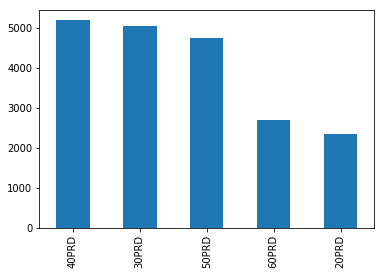

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [46]:
y_age.plot(kind='bar')
plt.show(y_age)


In [11]:
client.count()

ID            20000
GENDER        20000
AGE_PRD       20000
HOM_PST_NO    18635
dtype: int64

In [3]:
client.head(10)

,ID,GENDER,AGE_PRD,HOM_PST_NO
0,1,1,60PRD,52.0
1,2,2,60PRD,80.0
2,3,2,60PRD,620.0
3,4,1,60PRD,120.0
4,5,1,60PRD,NaN
5,6,2,60PRD,58.0
6,7,2,60PRD,52.0
7,8,2,60PRD,480.0
8,9,2,60PRD,470.0
9,10,1,60PRD,55.0


In [4]:
shop_product = pd.read_csv('제4회 Big Data Competition-분석용데이터-02.쇼핑업종 상품구매.txt',names=['고객식별번호','구매내역식별번호','쇼핑업종분류','소분류카테고리','점포코드','구매일자','구매시각','구매금액','구매수량'])

/Users/kwonsooyoung/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,1,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
shop_product = pd.read_csv('제4회 Big Data Competition-분석용데이터-02.쇼핑업종 상품구매.txt')

In [4]:
product_category = pd.read_csv('제4회 Big Data Competition-분석용데이터-04.쇼핑업종 상품분류.txt')

In [6]:
shop_product.head(10)

,ID,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT
0,4008,2108,A01,215,2,20150216,13,59600,2
1,6379,2109,A01,75,29,20150213,11,35000,1
2,6379,2109,A01,149,4,20150115,10,85000,1
3,8002,2110,A01,138,10,20151220,10,25000,1
4,8002,2110,A01,138,10,20151220,10,21000,1
5,8002,2110,A01,558,4,20150815,10,79200,1
6,7252,2111,A01,13,29,20150716,10,5400,1
7,5072,2112,A01,223,2,20150626,12,158000,1
8,5072,2112,A01,216,2,20150204,12,39000,1
9,5072,2112,A01,121,2,20150911,11,3000,1


In [6]:
notshop_product = pd.read_csv('제4회 Big Data Competition-분석용데이터-03.쇼핑외 업종 상품구매.txt', names=['고객식별번호','9개업종명','이용년도/월','이용금액','이용건수'])

/Users/kwonsooyoung/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
notshop_product = pd.read_csv('제4회 Big Data Competition-분석용데이터-03.쇼핑외 업종 상품구매.txt')

In [8]:
notshop_product.head(10)

,ID,BIZ_UNIT,CRYM,U_AM,U_CT
0,9544,D03,201511,14400,1
1,9544,C01,201510,18000,1
2,9544,D01,201508,9500,2
3,9544,D01,201507,4200,1
4,9544,D03,201505,3900,1
5,9544,D01,201512,26000,3
6,9544,D01,201510,9500,1
7,9544,B03,201504,314283,5
8,9544,C01,201502,38000,3
9,9544,D01,201502,18100,1


In [8]:
product_category = pd.read_csv('제4회 Big Data Competition-분석용데이터-04.쇼핑업종 상품분류.txt',names=['쇼핑업종분류','소분류카테고리','소분류명','중분류명','대분류명'])

In [102]:
product_category.head(20)

,BIZ_UNIT,PD_S_C,PD_S_NM,PD_M_NM,PD_H_NM
0,A04,341,단행본서적(직배),특수점서적,서적/음반
1,A04,1,삼각김밥,삼각김밥,미반
2,A04,2,The커진삼각김밥,삼각김밥,미반
3,A04,3,말이김밥,김밥,미반
4,A04,4,트레이김밥,김밥,미반
5,A04,5,초밥,김밥,미반
6,A04,6,도시락,도시락,미반
7,A04,7,미니도시락,도시락,미반
8,A04,8,기타,도시락,미반
9,A04,9,국/찌개도시락,도시락,미반


In [11]:
client.count()

ID            20000
GENDER        20000
AGE_PRD       20000
HOM_PST_NO    18635
dtype: int64

In [12]:
shop_product.count()

ID          3641082
RCT_NO      3641082
BIZ_UNIT    3641082
PD_S_C      3641082
BR_C        3641082
DE_DT       3641082
DE_HR       3641082
BUY_AM      3641082
BUY_CT      3641082
dtype: int64

In [13]:
notshop_product.count()

ID          178659
BIZ_UNIT    178659
CRYM        178659
U_AM        178659
U_CT        178659
dtype: int64

In [14]:
product_category.count()

BIZ_UNIT    3788
PD_S_C      3788
PD_S_NM     3788
PD_M_NM     3788
PD_H_NM     3788
dtype: int64

In [15]:
demo_nonshop.count()

ID            181038
GENDER        181038
AGE_PRD       181038
HOM_PST_NO    174605
BIZ_UNIT      178659
CRYM          178659
U_AM          178659
U_CT          178659
dtype: int64

In [17]:
demo_nonshop

,ID,GENDER,AGE_PRD,HOM_PST_NO,BIZ_UNIT,CRYM,U_AM,U_CT
0,1,1,60PRD,52.0,B03,201502.0,270518.0,3.0
1,1,1,60PRD,52.0,D03,201512.0,9200.0,1.0
2,1,1,60PRD,52.0,C01,201512.0,7500.0,1.0
3,1,1,60PRD,52.0,B03,201512.0,69887.0,1.0
4,1,1,60PRD,52.0,C01,201512.0,14000.0,1.0
5,1,1,60PRD,52.0,C02,201511.0,58000.0,1.0
6,1,1,60PRD,52.0,D03,201508.0,14200.0,2.0
7,1,1,60PRD,52.0,B03,201501.0,422006.0,2.0
8,1,1,60PRD,52.0,D03,201509.0,6000.0,1.0
9,1,1,60PRD,52.0,B03,201509.0,186437.0,3.0


In [16]:
demo_product = pd.merge(client, shop_product, how='left')

In [17]:
demo_product.count()

ID            3642532
GENDER        3642532
AGE_PRD       3642532
HOM_PST_NO    3548589
RCT_NO        3641082
BIZ_UNIT      3641082
PD_S_C        3641082
BR_C          3641082
DE_DT         3641082
DE_HR         3641082
BUY_AM        3641082
BUY_CT        3641082
dtype: int64

In [18]:
shop_product.count()

ID          3641082
RCT_NO      3641082
BIZ_UNIT    3641082
PD_S_C      3641082
BR_C        3641082
DE_DT       3641082
DE_HR       3641082
BUY_AM      3641082
BUY_CT      3641082
dtype: int64

In [19]:
demo_shop_nonshop = pd.merge(demo_product, notshop_product, on=['ID'], how='left')

In [ ]:
all_merge = pd.merge(demo_shop_nonshop, shop_category, on='PD_S_C', how='left')

In [21]:
demo_shop_nonshop.head(10)

,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT_x,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,BIZ_UNIT_y,CRYM,U_AM,U_CT
0,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,B03,201502.0,270518.0,3.0
1,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,D03,201512.0,9200.0,1.0
2,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,C01,201512.0,7500.0,1.0
3,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,B03,201512.0,69887.0,1.0
4,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,C01,201512.0,14000.0,1.0
5,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,C02,201511.0,58000.0,1.0
6,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,D03,201508.0,14200.0,2.0
7,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,B03,201501.0,422006.0,2.0
8,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,D03,201509.0,6000.0,1.0
9,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,B03,201509.0,186437.0,3.0


In [23]:
shop_category.head(10)

,ID,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM
0,4008,2108,A01,215,2,20150216,13,59600,2,이지캐주얼,캐주얼,여성의류
1,6379,2109,A01,75,29,20150213,11,35000,1,건강식품,건강식품,식품
2,6379,2109,A01,149,4,20150115,10,85000,1,기초A,화장품,잡화
3,8002,2110,A01,138,10,20151220,10,25000,1,기타,섬유잡화,잡화
4,8002,2110,A01,138,10,20151220,10,21000,1,기타,섬유잡화,잡화
5,8002,2110,A01,558,4,20150815,10,79200,1,캐주얼화,구두,잡화
6,7252,2111,A01,13,29,20150716,10,5400,1,일식델리,가공식품,식품
7,5072,2112,A01,223,2,20150626,12,158000,1,트래디셔널,트래디셔널,여성의류
8,5072,2112,A01,216,2,20150204,12,39000,1,쿨캐주얼,캐주얼,여성의류
9,5072,2112,A01,121,2,20150911,11,3000,1,식당가 한식,가공식품,식품


In [50]:
demo_shop.head(10)

,Unnamed: 0,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT
0,0,1,1,60PRD,52.0,383515,A01,478,2,20151216,17,28000,1
1,1,1,1,60PRD,52.0,314285,A01,478,2,20150513,14,15000,1
2,2,1,1,60PRD,52.0,48978,A01,366,2,20150801,19,166400,1
3,3,1,1,60PRD,52.0,48978,A01,232,2,20151228,12,166000,1
4,4,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,1000,2
5,5,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,6900,1
6,6,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,2400,2
7,7,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,1000,1
8,8,1,1,60PRD,52.0,370752,A01,15,2,20151104,18,3200,1
9,9,1,1,60PRD,52.0,100812,A01,236,2,20150128,12,29800,1


In [51]:
demo_shop_category=pd.merge(demo_shop, product_category, how='left')

In [5]:
demo_shop_category = pd.read_csv('demo_shop_category.csv')

In [10]:
demo_shop_category.head(30)

,Unnamed: 0,Unnamed: 0.1,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM
0,0,0,1,1,60PRD,52.0,383515,A01,478,2,20151216,17,28000,1,수입주방,주방용품,가정
1,1,1,1,1,60PRD,52.0,314285,A01,478,2,20150513,14,15000,1,수입주방,주방용품,가정
2,2,2,1,1,60PRD,52.0,48978,A01,366,2,20150801,19,166400,1,N/B골프의류,골프용품,스포츠
3,3,3,1,1,60PRD,52.0,48978,A01,232,2,20151228,12,166000,1,란제리,란제리/내의,여성의류
4,4,4,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,1000,2,어묵,젓갈/반찬,식품
5,5,5,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,6900,1,어묵,젓갈/반찬,식품
6,6,6,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,2400,2,어묵,젓갈/반찬,식품
7,7,7,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,1000,1,어묵,젓갈/반찬,식품
8,8,8,1,1,60PRD,52.0,370752,A01,15,2,20151104,18,3200,1,디저트류,차/커피,식품
9,9,9,1,1,60PRD,52.0,100812,A01,236,2,20150128,12,29800,1,홈웨어,기타의류,여성의류


In [6]:
del demo_shop_category['Unnamed: 0']

In [7]:
del demo_shop_category['Unnamed: 0.1']

In [13]:
demo_shop_category.head(30)

,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM
0,1,1,60PRD,52.0,383515,A01,478,2,20151216,17,28000,1,수입주방,주방용품,가정
1,1,1,60PRD,52.0,314285,A01,478,2,20150513,14,15000,1,수입주방,주방용품,가정
2,1,1,60PRD,52.0,48978,A01,366,2,20150801,19,166400,1,N/B골프의류,골프용품,스포츠
3,1,1,60PRD,52.0,48978,A01,232,2,20151228,12,166000,1,란제리,란제리/내의,여성의류
4,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,1000,2,어묵,젓갈/반찬,식품
5,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,6900,1,어묵,젓갈/반찬,식품
6,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,2400,2,어묵,젓갈/반찬,식품
7,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,1000,1,어묵,젓갈/반찬,식품
8,1,1,60PRD,52.0,370752,A01,15,2,20151104,18,3200,1,디저트류,차/커피,식품
9,1,1,60PRD,52.0,100812,A01,236,2,20150128,12,29800,1,홈웨어,기타의류,여성의류


In [13]:
shop_product.count()

ID          3641082
RCT_NO      3641082
BIZ_UNIT    3641082
PD_S_C      3641082
BR_C        3641082
DE_DT       3641082
DE_HR       3641082
BUY_AM      3641082
BUY_CT      3641082
dtype: int64

In [10]:
demo_shop_category.count()

ID            3641082
GENDER        3641082
AGE_PRD       3641082
HOM_PST_NO    3547456
RCT_NO        3641082
BIZ_UNIT      3641082
PD_S_C        3641082
BR_C          3641082
DE_DT         3641082
DE_HR         3641082
BUY_AM        3641082
BUY_CT        3641082
PD_S_NM       3641082
PD_M_NM       3641082
PD_H_NM       3641082
dtype: int64

### 연령대별 상품 가격과 수량의 합

In [22]:
demo_shop_category.groupby(demo_shop_category.AGE_PRD)["BUY_AM","BUY_CT"].sum()

,BUY_AM,BUY_CT
AGE_PRD,,
20PRD,4254370565,1865498
30PRD,18027935682,8888629
40PRD,21919910664,13579572
50PRD,28882821622,13653865
60PRD,17280892249,7504015


In [49]:
demo_shop_category.groupby(demo_shop_category.AGE_PRD)["BIZ_UNIT"].sum()

AGE_PRD
20PRD    A01A01A02A02A01A01A01A01A02A02A02A02A02A02A02A...
30PRD    A01A01A01A01A01A01A01A01A01A04A04A01A02A02A02A...
40PRD    A01A03A03A03A03A03A01A03A03A03A03A03A03A01A01A...
50PRD    A02A02A02A02A02A02A02A02A02A02A02A02A02A02A02A...
60PRD    A01A01A01A01A01A01A01A01A01A01A01A01A01A01A01A...
Name: BIZ_UNIT, dtype: object

In [54]:
demo_shop_category.groupby([demo_shop_category.AGE_PRD, demo_shop_category.BIZ_UNIT]).sum()

ID  GENDER   HOM_PST_NO       RCT_NO     PD_S_C  \
AGE_PRD BIZ_UNIT                                                            
20PRD   A01        727708822   86147   10313361.0  11503351510   10949065   
        A02       1186838258  136908   19338692.0  16175196089   75834644   
        A03        467898429   51606    5180013.0   2636870497   12621261   
        A04        420187104   38937    4281096.0   1109767081    5359213   
        A05         63427473    7487     788672.0     20670464     256794   
30PRD   A01       1939418468  301697   34519855.0  39767159174   38227660   
        A02       4680995816  682517   92976558.0  78133442424  386154761   
        A03       1798886621  262790   29401842.0  14002350732   64014263   
        A04        824353963  107101   11336904.0   2830105331   13427234   
        A05         76058902   12016     896736.0     29636973     412538   
40PRD   A01       1884191842  410940   43845202.0  55951345470   47552672   
        A02       4585031467  870054  108059513.0  91148067898  492651967   
        A03       2323430924  455087   44130980.0  21646335904  103731510   
        A04        507463632   96008    9396387.0   2576619979   12036614   
        A05         47683660   10210     724196.0     26272572     357770   
50PRD   A01       1696198965  474921   53321359.0  66433664951   52544067   
        A02       2998748119  742615   85795654.0  70824569206  407873125   
        A03       1542712053  332505   32864770.0  16009312450   70409217   
        A04        263676839   47410    3929736.0   1078980420    5524847   
        A05         22649128    6377     517077.0     16349101     235606   
60PRD   A01        712799880  291224   31949702.0  40337054425   31353595   
        A02       1019172030  371293   34282390.0  29997169627  206703726   
        A03        498115510  157501   11762913.0   6946020669   31818915   
        A04         41236986   12340    1033074.0    270510867    1407145   
        A05          8900902    2643     176160.0      6460981      92434   

                       BR_C           DE_DT    DE_HR       BUY_AM    BUY_CT  
AGE_PRD BIZ_UNIT                                                             
20PRD   A01          943112   1051764884043   843480   3486920460     69245  
        A02         4717446   1703774409470  1516498    565225925   1713643  
        A03         7150144    629688462921   530347    110472030     41536  
        A04        66423308    581146169488   394450     65397300     35993  
        A05           90200     87595613975    76895     26354850      5081  
30PRD   A01         3394681   3651987625455  2840078  13996808590    266799  
        A02        23029760   8543965977585  7172854   3084052524   8237427  
        A03        34545063   3247420833508  2680349    582774838    213548  
        A04       153358210   1492602382663  1046513    317556360    163080  
        A05          125307    137146368030   116000     46743370      7775  
40PRD   A01         4096984   4931071480344  3792404  16455409910    369183  
        A02        25567048  10874898544762  9054802   4188746861  12756459  
        A03        49816275   5483155372929  4565989   1053307623    352102  
        A04       137458227   1323236714207   974052    180500720     95040  
        A05          111283    119574781515    97315     41945550      6788  
50PRD   A01         4279968   5668363048451  4402421  24257443020    455700  
        A02        19710261   9065431943858  7603032   3508953944  12869608  
        A03        37403794   3973085263668  3268956   1013838908    286959  
        A04        60102135    581125581882   427766     75364760     37355  
        A05           69268     74598241816    62771     27220990      4243  
60PRD   A01         2303016   3491608270684  2639210  14867663450    298846  
        A02         7648911   4613812157481  3654769   1934118102   7065375  
        A03        15379473   1866051226459  1456404    450665127    12841

In [56]:
demo_shop_category.groupby([demo_shop_category.AGE_PRD, demo_shop_category.BIZ_UNIT])['GENDER'].value_counts()

AGE_PRD  BIZ_UNIT  GENDER
20PRD    A01       2          33952
                   1          18243
         A02       2          52356
                   1          32196
         A03       2          20357
                   1          10892
         A04       1          18743
                   2          10097
         A05       2           3140
                   1           1207
30PRD    A01       2         120463
                   1          60771
         A02       2         258511
                   1         165495
         A03       2         101633
                   1          59524
         A04       1          41043
                   2          33029
         A05       2           5210
                   1           1596
40PRD    A01       2         166230
                   1          78480
         A02       2         330372
                   1         209310
         A03       2         182979
                   1          89129
         A04       1          35326
  

### 연령별 쇼핑업종별 성별 상품가격과 수량의 합

In [24]:
demo_shop_category.groupby([demo_shop_category.AGE_PRD,demo_shop_category.BIZ_UNIT, demo_shop_category.GENDER])["BUY_AM","BUY_CT"].sum()

BUY_AM   BUY_CT
AGE_PRD BIZ_UNIT GENDER                      
20PRD   A01      1        1508275570    24412
                 2        1978644890    44833
        A02      1         237340077   709264
                 2         327885848  1004379
        A03      1          38410505    15470
                 2          72061525    26066
        A04      1          44335190    23561
                 2          21062110    12432
        A05      1           6826520     1497
                 2          19528330     3584
30PRD   A01      1        5734308830    91848
                 2        8262499760   174951
        A02      1        1225899120  3443675
                 2        1858153404  4793752
        A03      1         222721098    81996
                 2         360053740   131552
        A04      1         164368330   113807
                 2         153188030    49273
        A05      1          11745130     1891
                 2          34998240     5884
40PRD   A01      1        5772822060   121271
                 2       10682587850   247912
        A02      1        1798392759  5125370
                 2        2390354102  7631089
        A03      1         328111740   116594
                 2         725195883   235508
        A04      1          99311800    49225
                 2          81188920    45815
        A05      1          10869780     1972
                 2          31075770     4816
50PRD   A01      1        8489628770   154981
                 2       15767814250   300719
        A02      1        1271638630  4091359
                 2        2237315314  8778249
        A03      1         426306950   102014
                 2         587531958   184945
        A04      1          27354930    14214
                 2          48009830    23141
        A05      1           7270900     1200
                 2          19950090     3043
60PRD   A01      1        4888323460   101107
                 2        9979339990   197739
        A02      1         766604938  2506992
                 2        1167513164  4558383
        A03      1         141944481    38913
                 2         308720646    89504
        A04      1           5891790     3031
                 2          12335690     6615
        A05      1           2459220      364
                 2           7758870     1367

### 연령별 쇼핑업종별 성별 상품구매건수

(A01:백화점, A02:대형마트, A03:슈퍼마켓, A04:편의점, A05:드러그스토어) <br/>
(1: 남성, 2: 여성)

In [26]:
demo_shop_category.groupby([demo_shop_category.AGE_PRD,demo_shop_category.BIZ_UNIT, demo_shop_category.GENDER]).size()

AGE_PRD  BIZ_UNIT  GENDER
20PRD    A01       1          18243
                   2          33952
         A02       1          32196
                   2          52356
         A03       1          10892
                   2          20357
         A04       1          18743
                   2          10097
         A05       1           1207
                   2           3140
30PRD    A01       1          60771
                   2         120463
         A02       1         165495
                   2         258511
         A03       1          59524
                   2         101633
         A04       1          41043
                   2          33029
         A05       1           1596
                   2           5210
40PRD    A01       1          78480
                   2         166230
         A02       1         209310
                   2         330372
         A03       1          89129
                   2         182979
         A04       1          35326
  

In [32]:
demo_shop_category.groupby([demo_shop_category.AGE_PRD,demo_shop_category.BIZ_UNIT, demo_shop_category.GENDER])["BIZ_UNIT","PD_S_C","BUY_AM","BUY_CT"].describe()

PD_S_C                                              \
                            count        mean         std  min    25%     50%   
AGE_PRD BIZ_UNIT GENDER                                                         
20PRD   A01      1        18243.0  215.199912  169.687683  1.0   85.0   179.0   
                 2        33952.0  206.855944  172.837656  1.0   82.0   147.0   
        A02      1        32196.0  878.598956  516.678068  1.0  388.0  1056.0   
                 2        52356.0  908.153258  501.526007  1.0  505.0  1076.0   
        A03      1        10892.0  421.910026  202.676177  1.0  319.0   428.0   
                 2        20357.0  394.253426  229.151487  1.0  267.0   411.0   
        A04      1        18743.0  192.474310  123.700918  1.0   66.0   183.0   
                 2        10097.0  173.483906  122.009154  1.0   62.0   140.0   
        A05      1         1207.0   53.566694   38.180078  1.0   18.0    52.0   
                 2         3140.0   61.190764   37.384064  1.0   34.0    67.0   
30PRD   A01      1        60771.0  218.885801  182.531580  1.0   77.0   149.0   
                 2       120463.0  206.916240  179.674980  1.0   71.0   145.0   
        A02      1       165495.0  904.815366  495.128791  1.0  514.0  1050.0   
                 2       258511.0  914.515599  494.978891  1.0  517.0  1064.0   
        A03      1        59524.0  406.806381  219.689220  1.0  302.0   425.0   
                 2       101633.0  391.600366  227.154507  1.0  262.0   415.0   
        A04      1        41043.0  192.105182  123.515767  1.0   66.0   183.0   
                 2        33029.0  167.811953  119.157535  1.0   60.0   134.0   
        A05      1         1596.0   59.799499   39.950423  1.0   22.0    60.0   
                 2         5210.0   60.863340   39.005158  1.0   25.0    65.0   
40PRD   A01      1        78480.0  205.019419  182.449958  1.0   60.0   138.0   
                 2       166230.0  189.272382  174.186056  1.0   60.0   134.0   
        A02      1       209310.0  911.469801  489.801781  1.0  528.0  1056.0   
                 2       330372.0  913.734284  486.757848  1.0  518.0  1059.0   
        A03      1        89129.0  389.383489  217.010474  1.0  272.0   415.0   
                 2       182979.0  377.235360  225.559083  1.0  187.0   410.0   
        A04      1        35326.0  191.059616  121.971720  1.0   69.0   182.0   
                 2        30341.0  174.260637  118.256631  1.0   62.0   140.0   
        A05      1         1658.0   53.365501   42.134699  1.0    9.0    47.0   
                 2         4276.0   62.977081   37.584007  1.0   37.0    69.0   
50PRD   A01      1        87677.0  193.631408  173.791037  1.0   60.0   145.0   
                 2       193622.0  183.693206  171.738642  1.0   55.0   131.0   
        A02      1       157155.0  901.988114  483.703153  1.0  517.0  1044.0   
                 2       292730.0  909.101161  479.538391  1.0  528.0  1048.0   
        A03      1        61833.0  365.766985  232.765673  1.0  111.0   407.0   
                 2       135336.0  353.141418  238.903836  1.0   97.0   403.0   
        A04      1        10268.0  190.773276  123.638139  1.0   69.0   182.0   
                 2        18571.0  192.019116  124.995550  1.0   75.0   182.0   
        A05      1         1027.0   62.183057   37.127193  1.0   37.0    69.0   
                 2         2675.0   64.203364   35.841009  1.0   39.0    69.0   
60PRD   A01      1        55326.0  183.112063  176.297622  1.0   53.0   121.0   
                 2       117949.0  179.931470  173.937975  1.0   38.0   121.0   
        A02      1        86641.0  898.960342  477.204844  1.0  528.0  1016.0   
                 2       142326.0  905.083421  476.574662  1.0  532.0  1023.0   
        A03      1        27709.0  349.754340  237.237876  1.0   96.0   401.0   
                 2        64896.0  340.969736  243.957068  1.0   90.0   363.0   
        A04      1         2240.0  192.766071  129.707882 

In [11]:
import matplotlib as mpl
import matplotlib.pylab as plt

In [36]:
demo_shop_category.head(10)

,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM
0,1,1,60PRD,52.0,383515,A01,478,2,20151216,17,28000,1,수입주방,주방용품,가정
1,1,1,60PRD,52.0,314285,A01,478,2,20150513,14,15000,1,수입주방,주방용품,가정
2,1,1,60PRD,52.0,48978,A01,366,2,20150801,19,166400,1,N/B골프의류,골프용품,스포츠
3,1,1,60PRD,52.0,48978,A01,232,2,20151228,12,166000,1,란제리,란제리/내의,여성의류
4,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,1000,2,어묵,젓갈/반찬,식품
5,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,6900,1,어묵,젓갈/반찬,식품
6,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,2400,2,어묵,젓갈/반찬,식품
7,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,1000,1,어묵,젓갈/반찬,식품
8,1,1,60PRD,52.0,370752,A01,15,2,20151104,18,3200,1,디저트류,차/커피,식품
9,1,1,60PRD,52.0,100812,A01,236,2,20150128,12,29800,1,홈웨어,기타의류,여성의류


### 연령별 비율 바 그래프

In [47]:
y_age=demo_shop_category['AGE_PRD'].value_counts()
y_age

40PRD    1128101
50PRD     960894
30PRD     847275
60PRD     503629
20PRD     201183
Name: AGE_PRD, dtype: int64

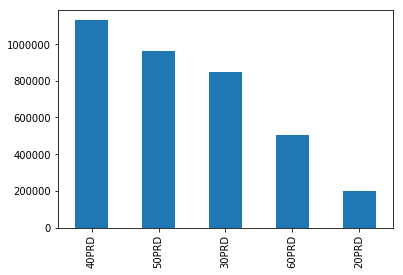

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [48]:
y_age.plot(kind='bar')
plt.show(y_age)

### 연령별 쇼핑업종별 성별 구매건수 현황 그래프

In [8]:
y_age = demo_shop_category.groupby([demo_shop_category.AGE_PRD, demo_shop_category.BIZ_UNIT])['GENDER'].value_counts()
y_age

AGE_PRD  BIZ_UNIT  GENDER
20PRD    A01       2          33952
                   1          18243
         A02       2          52356
                   1          32196
         A03       2          20357
                   1          10892
         A04       1          18743
                   2          10097
         A05       2           3140
                   1           1207
30PRD    A01       2         120463
                   1          60771
         A02       2         258511
                   1         165495
         A03       2         101633
                   1          59524
         A04       1          41043
                   2          33029
         A05       2           5210
                   1           1596
40PRD    A01       2         166230
                   1          78480
         A02       2         330372
                   1         209310
         A03       2         182979
                   1          89129
         A04       1          35326
  

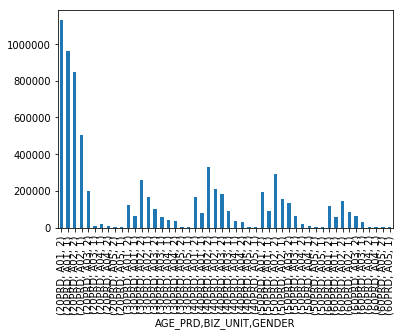

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [58]:
y_age.plot(kind='bar')
plt.show(y_age)

### 연령별 성별 구매건수

In [12]:
y_age = demo_shop_category.groupby([demo_shop_category.AGE_PRD])['GENDER'].value_counts()
y_age

AGE_PRD  GENDER
20PRD    2         119902
         1          81281
30PRD    2         518846
         1         328429
40PRD    2         714198
         1         413903
50PRD    2         642934
         1         317960
60PRD    2         331372
         1         172257
Name: GENDER, dtype: int64

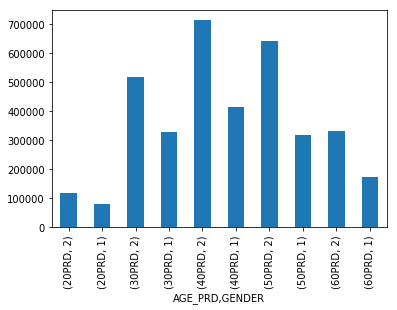

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [13]:
y_age.plot(kind='bar')
plt.show(y_age)

In [14]:
demo_shop_category.describe()

,ID,GENDER,HOM_PST_NO,RCT_NO,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT
count,3.641082e+06,3.641082e+06,3.547456e+06,3.641082e+06,3.641082e+06,3.641082e+06,3.641082e+06,3.641082e+06,3.641082e+06,3.641082e+06
mean,8.332080e+03,1.639165e+00,1.890997e+02,1.564033e+05,5.689382e+02,1.854121e+02,2.015062e+07,1.629972e+01,2.481843e+04,1.249397e+01
std,5.371565e+03,4.802428e-01,1.847595e+02,1.161246e+05,4.908861e+02,5.915553e+02,7.112611e+02,3.438423e+00,2.531372e+05,1.043572e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.014123e+07,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.861000e+03,1.000000e+00,5.500000e+01,5.980600e+04,1.230000e+02,1.100000e+01,2.015040e+07,1.400000e+01,2.000000e+03,1.000000e+00
50%,7.463000e+03,2.000000e+00,1.000000e+02,1.350390e+05,4.370000e+02,3.600000e+01,2.015063e+07,1.600000e+01,4.480000e+03,1.000000e+00
75%,1.251600e+04,2.000000e+00,3.400000e+02,2.391890e+05,9.930000e+02,1.060000e+02,2.015092e+07,1.900000e+01,1.000000e+04,1.000000e+00
max,2.000000e+04,2.000000e+00,6.300000e+02,4.817810e+05,1.627000e+03,4.828000e+03,2.015123e+07,2.300000e+01,1.660300e+08,1.005000e+04


In [20]:
demo_shop_category[demo_shop_category['HOM_PST_NO']==0].count()

ID            28046
GENDER        28046
AGE_PRD       28046
HOM_PST_NO    28046
RCT_NO        28046
BIZ_UNIT      28046
PD_S_C        28046
BR_C          28046
DE_DT         28046
DE_HR         28046
BUY_AM        28046
BUY_CT        28046
PD_S_NM       28046
PD_M_NM       28046
PD_H_NM       28046
dtype: int64

### 연령별 쇼핑업종별 구매 건수

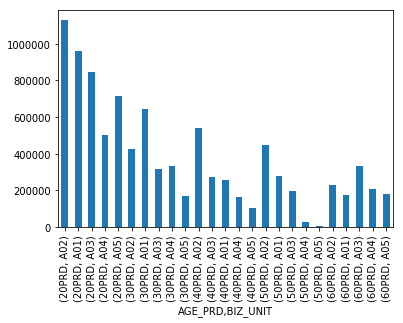

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [61]:
y_age = demo_shop_category.groupby([demo_shop_category.AGE_PRD])['BIZ_UNIT'].value_counts()
y_age.plot(kind='bar')
plt.show(y_age)

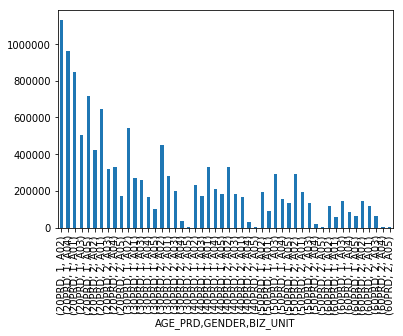

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [63]:
y_age = demo_shop_category.groupby([demo_shop_category.AGE_PRD,demo_shop_category.GENDER])['BIZ_UNIT'].value_counts()
y_age.plot(kind='bar')
plt.show(y_age)

In [14]:
y_age = demo_shop_category.groupby([demo_shop_category.AGE_PRD,demo_shop_category.BIZ_UNIT])['BUY_AM'].value_counts()
y_age.plot(kind='bar')
plt.show(y_age)

KeyboardInterrupt: 

In [ ]:
y_age = demo_shop_category.groupby([demo_shop_category.AGE_PRD,demo_shop_category.GENDER])['PD_S_C'].value_counts()
y_age.plot(kind='bar')
plt.show(y_age)

In [15]:
import matplotlib.pyplot as plt

In [ ]:
y_age = demo_shop_category.groupby([demo_shop_category.AGE_PRD,demo_shop_category.GENDER])['BIZ_UNIT'].value_counts()
y_age.plot(kind='box')
plt.show(y_age)

In [19]:
df = pd.DataFrame(np.random.rand(10,3),columns=['A','B','C'])
df

,A,B,C
0,0.286886,0.754878,0.016754
1,0.091023,0.903603,0.095078
2,0.809334,0.561802,0.929033
3,0.474199,0.144200,0.396385
4,0.043888,0.572430,0.052073
5,0.283369,0.777610,0.422493
6,0.011484,0.262627,0.346643
7,0.241504,0.724237,0.121201
8,0.697868,0.485373,0.905986
9,0.934183,0.507081,0.763951


In [35]:
demo_shop_category.dtypes

ID              int64
GENDER          int64
AGE_PRD        object
HOM_PST_NO    float64
RCT_NO          int64
BIZ_UNIT       object
PD_S_C          int64
BR_C            int64
DE_DT           int64
DE_HR           int64
BUY_AM          int64
BUY_CT          int64
PD_S_NM        object
PD_M_NM        object
PD_H_NM        object
dtype: object

In [15]:
demo_shop_category.describe()

,ID,GENDER,HOM_PST_NO,RCT_NO,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT
count,3.641082e+06,3.641082e+06,3.547456e+06,3.641082e+06,3.641082e+06,3.641082e+06,3.641082e+06,3.641082e+06,3.641082e+06,3.641082e+06
mean,8.332080e+03,1.639165e+00,1.890997e+02,1.564033e+05,5.689382e+02,1.854121e+02,2.015062e+07,1.629972e+01,2.481843e+04,1.249397e+01
std,5.371565e+03,4.802428e-01,1.847595e+02,1.161246e+05,4.908861e+02,5.915553e+02,7.112611e+02,3.438423e+00,2.531372e+05,1.043572e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.014123e+07,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.861000e+03,1.000000e+00,5.500000e+01,5.980600e+04,1.230000e+02,1.100000e+01,2.015040e+07,1.400000e+01,2.000000e+03,1.000000e+00
50%,7.463000e+03,2.000000e+00,1.000000e+02,1.350390e+05,4.370000e+02,3.600000e+01,2.015063e+07,1.600000e+01,4.480000e+03,1.000000e+00
75%,1.251600e+04,2.000000e+00,3.400000e+02,2.391890e+05,9.930000e+02,1.060000e+02,2.015092e+07,1.900000e+01,1.000000e+04,1.000000e+00
max,2.000000e+04,2.000000e+00,6.300000e+02,4.817810e+05,1.627000e+03,4.828000e+03,2.015123e+07,2.300000e+01,1.660300e+08,1.005000e+04


In [53]:
demo_shop_category.head(10)

,Unnamed: 0,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM
0,0,1,1,60PRD,52.0,383515,A01,478,2,20151216,17,28000,1,수입주방,주방용품,가정
1,1,1,1,60PRD,52.0,314285,A01,478,2,20150513,14,15000,1,수입주방,주방용품,가정
2,2,1,1,60PRD,52.0,48978,A01,366,2,20150801,19,166400,1,N/B골프의류,골프용품,스포츠
3,3,1,1,60PRD,52.0,48978,A01,232,2,20151228,12,166000,1,란제리,란제리/내의,여성의류
4,4,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,1000,2,어묵,젓갈/반찬,식품
5,5,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,6900,1,어묵,젓갈/반찬,식품
6,6,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,2400,2,어묵,젓갈/반찬,식품
7,7,1,1,60PRD,52.0,204739,A01,71,2,20150513,12,1000,1,어묵,젓갈/반찬,식품
8,8,1,1,60PRD,52.0,370752,A01,15,2,20151104,18,3200,1,디저트류,차/커피,식품
9,9,1,1,60PRD,52.0,100812,A01,236,2,20150128,12,29800,1,홈웨어,기타의류,여성의류


In [54]:
demo_shop_category.to_csv('demo_shop_category.csv')

In [18]:
demo_product_right = pd.merge(client, shop_product, how='right')

In [19]:
demo_product_right.count()

ID            3641082
GENDER        3641082
AGE_PRD       3641082
HOM_PST_NO    3547456
RCT_NO        3641082
BIZ_UNIT      3641082
PD_S_C        3641082
BR_C          3641082
DE_DT         3641082
DE_HR         3641082
BUY_AM        3641082
BUY_CT        3641082
dtype: int64

In [20]:
demo_product_right.to_csv('demo_shop.csv')

In [8]:
demo_product.to_csv('demo_shop.csv')

In [9]:
demo_nonshop = pd.merge(client, notshop_product, how='left')

In [21]:
demo_nonshop_right = pd.merge(client, notshop_product, how='right')

In [23]:
demo_nonshop_right.to_csv('demo_nonshop.csv')

In [22]:
demo_nonshop_right.count()

ID            178659
GENDER        178659
AGE_PRD       178659
HOM_PST_NO    172624
BIZ_UNIT      178659
CRYM          178659
U_AM          178659
U_CT          178659
dtype: int64

In [10]:
demo_nonshop.to_csv('demo_notshop.csv')

In [13]:
demo_product.head(10)

,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT
0,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0
1,1,1,60PRD,52.0,314285.0,A01,478.0,2.0,20150513.0,14.0,15000.0,1.0
2,1,1,60PRD,52.0,48978.0,A01,366.0,2.0,20150801.0,19.0,166400.0,1.0
3,1,1,60PRD,52.0,48978.0,A01,232.0,2.0,20151228.0,12.0,166000.0,1.0
4,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,1000.0,2.0
5,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,6900.0,1.0
6,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,2400.0,2.0
7,1,1,60PRD,52.0,204739.0,A01,71.0,2.0,20150513.0,12.0,1000.0,1.0
8,1,1,60PRD,52.0,370752.0,A01,15.0,2.0,20151104.0,18.0,3200.0,1.0
9,1,1,60PRD,52.0,100812.0,A01,236.0,2.0,20150128.0,12.0,29800.0,1.0


In [14]:
demo_product.count()

ID            3642532
GENDER        3642532
AGE_PRD       3642532
HOM_PST_NO    3548589
RCT_NO        3641082
BIZ_UNIT      3641082
PD_S_C        3641082
BR_C          3641082
DE_DT         3641082
DE_HR         3641082
BUY_AM        3641082
BUY_CT        3641082
dtype: int64

In [7]:
all_merge= pd.merge(demo_product, notshop_product, on='ID',how='left')

In [114]:
all_merge.head(30)

,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BIZ_UNIT_x,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,BIZ_UNIT_y,CRYM,U_AM,U_CT
0,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,B03,201502.0,270518.0,3.0
1,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,D03,201512.0,9200.0,1.0
2,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,C01,201512.0,7500.0,1.0
3,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,B03,201512.0,69887.0,1.0
4,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,C01,201512.0,14000.0,1.0
5,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,C02,201511.0,58000.0,1.0
6,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,D03,201508.0,14200.0,2.0
7,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,B03,201501.0,422006.0,2.0
8,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,D03,201509.0,6000.0,1.0
9,1,1,60PRD,52.0,383515.0,A01,478.0,2.0,20151216.0,17.0,28000.0,1.0,B03,201509.0,186437.0,3.0


In [ ]:
all_merge.to_csv('all_merge.csv')

In [109]:
all_merge.dtypes

ID              int64
GENDER          int64
AGE_PRD        object
HOM_PST_NO    float64
RCT_NO        float64
BIZ_UNIT       object
PD_S_C        float64
BR_C          float64
DE_DT         float64
DE_HR         float64
BUY_AM        float64
BUY_CT        float64
CRYM          float64
U_AM          float64
U_CT          float64
dtype: object

In [ ]:
all_merge.count()

In [21]:
shop = pd.merge(shop_product, product_category, on=['쇼핑업종분류','소분류카테고리'], how='left')

In [24]:
shop = pd.merge(shop_product, product_category, on=['BIZ_UNIT','PD_S_C'], how='left')

In [25]:
shop.count()

ID          3641082
RCT_NO      3641082
BIZ_UNIT    3641082
PD_S_C      3641082
BR_C        3641082
DE_DT       3641082
DE_HR       3641082
BUY_AM      3641082
BUY_CT      3641082
PD_S_NM     3641082
PD_M_NM     3641082
PD_H_NM     3641082
dtype: int64

In [26]:
shop.to_csv('shop_product.csv')

In [91]:
shop1 = pd.merge(shop_product1, product_category1, on=['BIZ_UNIT','PD_S_C'], how='left')

In [92]:
shop1.tail(10)

,ID,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM
3641072,7579,29256,A03,540,14,20150417,14,3990,1,냉장치킨족발류,냉장간식MS,MS
3641073,7579,29256,A03,285,14,20150417,14,7980,2,일반계란,계란류,채소
3641074,7579,29256,A03,6,14,20150417,14,10000,1,찹쌀,잡곡,곡물
3641075,7579,29256,A03,71,14,20150417,14,1800,1,콩나물,두채류,채소
3641076,2050,29312,A03,424,14,20150427,17,11280,2,생수,생수,음료
3641077,2001,29342,A03,429,14,20150503,10,1500,1,스포츠음료,기능성음료,음료
3641078,2001,29342,A03,443,14,20150503,10,3560,4,일반두유,두유,음료
3641079,2001,29342,A03,14,14,20150503,10,2490,1,가지,과채류,채소
3641080,2001,29342,A03,435,14,20150503,10,1890,1,과일음료,과채음료,음료
3641081,2001,29342,A03,374,14,20150503,10,4500,1,깨,조미료,조미료류


In [93]:
shop1.count()

ID          3641082
RCT_NO      3641082
BIZ_UNIT    3641082
PD_S_C      3641082
BR_C        3641082
DE_DT       3641082
DE_HR       3641082
BUY_AM      3641082
BUY_CT      3641082
PD_S_NM     3641082
PD_M_NM     3641082
PD_H_NM     3641082
dtype: int64

In [94]:
shop1.to_csv('shop.csv')

In [22]:
shop.head(10)

,고객식별번호,구매내역식별번호,쇼핑업종분류,소분류카테고리,점포코드,구매일자,구매시각,구매금액,구매수량,소분류명,중분류명,대분류명
0,ID,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM
1,04008,002108,A01,0215,0002,20150216,13,59600,2,이지캐주얼,캐주얼,여성의류
2,06379,002109,A01,0075,0029,20150213,11,35000,1,건강식품,건강식품,식품
3,06379,002109,A01,0149,0004,20150115,10,85000,1,기초A,화장품,잡화
4,08002,002110,A01,0138,0010,20151220,10,25000,1,기타,섬유잡화,잡화
5,08002,002110,A01,0138,0010,20151220,10,21000,1,기타,섬유잡화,잡화
6,08002,002110,A01,0558,0004,20150815,10,79200,1,캐주얼화,구두,잡화
7,07252,002111,A01,0013,0029,20150716,10,5400,1,일식델리,가공식품,식품
8,05072,002112,A01,0223,0002,20150626,12,158000,1,트래디셔널,트래디셔널,여성의류
9,05072,002112,A01,0216,0002,20150204,12,39000,1,쿨캐주얼,캐주얼,여성의류


In [23]:
shop.count()

고객식별번호      3641083
구매내역식별번호    3641083
쇼핑업종분류      3641083
소분류카테고리     3641083
점포코드        3641083
구매일자        3641083
구매시각        3641083
구매금액        3641083
구매수량        3641083
소분류명          65536
중분류명          65536
대분류명          65536
dtype: int64

In [25]:
len(shop['고객식별번호'].unique())

26796

In [26]:
len(shop_product['고객식별번호'].unique())

26796

In [27]:
shop.to_csv('shop.csv',sep=',')

In [28]:
shop

,고객식별번호,구매내역식별번호,쇼핑업종분류,소분류카테고리,점포코드,구매일자,구매시각,구매금액,구매수량,소분류명,중분류명,대분류명
0,ID,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM
1,04008,002108,A01,0215,0002,20150216,13,59600,2,이지캐주얼,캐주얼,여성의류
2,06379,002109,A01,0075,0029,20150213,11,35000,1,건강식품,건강식품,식품
3,06379,002109,A01,0149,0004,20150115,10,85000,1,기초A,화장품,잡화
4,08002,002110,A01,0138,0010,20151220,10,25000,1,기타,섬유잡화,잡화
5,08002,002110,A01,0138,0010,20151220,10,21000,1,기타,섬유잡화,잡화
6,08002,002110,A01,0558,0004,20150815,10,79200,1,캐주얼화,구두,잡화
7,07252,002111,A01,0013,0029,20150716,10,5400,1,일식델리,가공식품,식품
8,05072,002112,A01,0223,0002,20150626,12,158000,1,트래디셔널,트래디셔널,여성의류
9,05072,002112,A01,0216,0002,20150204,12,39000,1,쿨캐주얼,캐주얼,여성의류


In [37]:
product_category.loc[product_category['소분류카테고리']=='0014']

,쇼핑업종분류,소분류카테고리,소분류명,중분류명,대분류명
15,A04,0014,조리면,조리면,미반
1361,A02,0014,기타잎채소,잎채소,잎/샐러드채소
2190,A03,0014,가지,과채류,채소
2748,A05,0014,혼합탄산,음료,식품
3630,A01,0014,서양델리,가공식품,식품


In [35]:
product_category.describe()

,쇼핑업종분류,소분류카테고리,소분류명,중분류명,대분류명
count,3789,3789,3789,3789,3789
unique,6,1628,3149,691,149
top,A02,0094,기타,스포츠,생활잡화
freq,1627,5,23,76,218


In [36]:
shop_product.describe()

,고객식별번호,구매내역식별번호,쇼핑업종분류,소분류카테고리,점포코드,구매일자,구매시각,구매금액,구매수량
count,3641083,3641083,3641083,3641083,3641083,3641083,3641083,3641083,3641083
unique,26796,498515,6,3086,5829,737,49,39555,3114
top,16742,17045,A02,210,7,20150808,17,1000,1
freq,5355,120,1727092,46953,259740,15882,378227,100400,3026231


In [43]:
all_merge.to_csv('all_merge.csv',sep=',')

In [44]:
all_merge.count()

고객식별번호       728878
성별           728878
연령대          728878
우편번호3자리      714779
구매내역식별번호     669040
쇼핑업종분류       669040
제휴사상품분류정보    669040
점포코드         669040
구매일자         669040
구매시각         669040
구매금액         669040
구매수량         669040
9개업종명        705204
이용년도/월       705204
이용금액         705204
이용건수         705204
dtype: int64

In [46]:
print(type(shop_product['소분류카테고리']))

<class 'pandas.core.series.Series'>


In [48]:
shop_product.tail(30)

,고객식별번호,구매내역식별번호,쇼핑업종분류,소분류카테고리,점포코드,구매일자,구매시각,구매금액,구매수량
3641053,997,30983,A03,528,412,20151211,19,990,1
3641054,3510,29212,A03,319,14,20150408,17,2690,1
3641055,3510,29212,A03,514,14,20150408,17,6490,1
3641056,3510,29212,A03,302,14,20150408,17,3190,1
3641057,3510,29212,A03,329,14,20150408,17,16300,1
3641058,3510,29212,A03,246,14,20150408,17,5535,1
3641059,3510,29212,A03,246,14,20150408,17,8265,1
3641060,3510,29212,A03,491,14,20150408,17,4600,2
3641061,3510,29212,A03,324,14,20150408,17,8000,4
3641062,1037,29214,A03,27,14,20150408,16,2000,2


In [90]:
shop_product1['PD_S_C'].apply(lambda x: '%04d'% x)

0          0215
1          0075
2          0149
3          0138
4          0138
5          0558
6          0013
7          0223
8          0216
9          0121
10         0121
11         0421
12         0421
13         0532
14         0113
15         0143
16         0439
17         0531
18         0208
19         0558
20         0165
21         0107
22         0421
23         0153
24         0488
25         0145
26         0145
27         0514
28         0501
29         0191
           ... 
3641052    0528
3641053    0319
3641054    0514
3641055    0302
3641056    0329
3641057    0246
3641058    0246
3641059    0491
3641060    0324
3641061    0027
3641062    0107
3641063    0046
3641064    0114
3641065    0073
3641066    0050
3641067    0234
3641068    0285
3641069    0895
3641070    0880
3641071    0436
3641072    0540
3641073    0285
3641074    0006
3641075    0071
3641076    0424
3641077    0429
3641078    0443
3641079    0014
3641080    0435
3641081    0374
Name: PD_S_C, Length: 36

In [74]:
shop_product['소분류카테고리'].apply(lambda x: str(x))

0          PD_S_C
1            0215
2            0075
3            0149
4            0138
5            0138
6            0558
7            0013
8            0223
9            0216
10           0121
11           0121
12           0421
13           0421
14           0532
15           0113
16           0143
17           0439
18           0531
19           0208
20           0558
21           0165
22           0107
23           0421
24           0153
25           0488
26           0145
27           0145
28           0514
29           0501
            ...  
3641053       528
3641054       319
3641055       514
3641056       302
3641057       329
3641058       246
3641059       246
3641060       491
3641061       324
3641062        27
3641063       107
3641064        46
3641065       114
3641066        73
3641067        50
3641068       234
3641069       285
3641070       895
3641071       880
3641072       436
3641073       540
3641074       285
3641075         6
3641076        71
3641077   

In [81]:
shop_product['소분류카테고리'] = shop_product.소분류카테고리.str

In [ ]:
shop_product.dtypes

In [89]:
shop_product1.dtypes

ID           int64
RCT_NO       int64
BIZ_UNIT    object
PD_S_C       int64
BR_C         int64
DE_DT        int64
DE_HR        int64
BUY_AM       int64
BUY_CT       int64
dtype: object

In [64]:
type(shop_product['소분류카테고리'])

pandas.core.series.Series

In [66]:
shop_product

,고객식별번호,구매내역식별번호,쇼핑업종분류,소분류카테고리,점포코드,구매일자,구매시각,구매금액,구매수량
0,ID,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT
1,04008,002108,A01,0215,0002,20150216,13,59600,2
2,06379,002109,A01,0075,0029,20150213,11,35000,1
3,06379,002109,A01,0149,0004,20150115,10,85000,1
4,08002,002110,A01,0138,0010,20151220,10,25000,1
5,08002,002110,A01,0138,0010,20151220,10,21000,1
6,08002,002110,A01,0558,0004,20150815,10,79200,1
7,07252,002111,A01,0013,0029,20150716,10,5400,1
8,05072,002112,A01,0223,0002,20150626,12,158000,1
9,05072,002112,A01,0216,0002,20150204,12,39000,1
